# Отток клиентов оператора связи "ТелеДом"

**Введение**

Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Нам предоставили 4 файла с данными и просят на основании предоставленных данных сделать модель для предсказания факта уйдёт клиент или нет.

**Описание услуг**

Оператор предоставляет два основных типа услуг:

-	Стационарную телефонную связь. Телефон можно подключить к нескольким линиям одновременно.
-	Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line — «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

Также доступны такие услуги:

-	Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
-	Выделенная линия технической поддержки (TechSupport);
-	Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
-	Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).

Клиенты могут платить за услуги каждый месяц или заключить договор на 1–2 года. Возможно оплатить счёт разными способами, а также получить электронный чек.

**Описание данных**

Данные состоят из нескольких файлов, полученных из разных источников:

-	contract_new.csv — информация о договоре;
-	personal_new.csv — персональные данные клиента;
-	internet_new.csv — информация об интернет-услугах;
-	phone_new.csv — информация об услугах телефонии.

Файл contract_new.csv

-	customerID — идентификатор абонента;
-	BeginDate — дата начала действия договора;
-	EndDate — дата окончания действия договора;
-	Type — тип оплаты: раз в год-два или ежемесячно;
-	PaperlessBilling — электронный расчётный лист;
-	PaymentMethod — тип платежа;
-	MonthlyCharges — расходы за месяц;
-	TotalCharges — общие расходы абонента.

Файл personal_new.csv

-	customerID — идентификатор пользователя;
-	gender — пол;
-	SeniorCitizen — является ли абонент пенсионером;
-	Partner — есть ли у абонента супруг или супруга;
-	Dependents — есть ли у абонента дети.

Файл internet_new.csv

-	customerID — идентификатор пользователя;
-	InternetService — тип подключения;
-	OnlineSecurity — блокировка опасных сайтов;
-	OnlineBackup — облачное хранилище файлов для резервного копирования данных;
-	DeviceProtection — антивирус;
-	TechSupport — выделенная линия технической поддержки;
-	StreamingTV — стриминговое телевидение;
-	StreamingMovies — каталог фильмов.

Файл phone_new.csv

-	customerID — идентификатор пользователя;
-	MultipleLines — подключение телефона к нескольким линиям одновременно.

Во всех файлах столбец customerID содержит код клиента. Информация о договорах актуальна на 1 февраля 2020 года.

**Во время решения данной задачи мы будем придерживаться следующего плана:**

1. Загрузка данных
    1. Загрузка данных
    2. Первичный осмотр данных
2. Проведение исследовательского анализа и преобработки данных
    1. Исследователький анализ каждого датафрейма
    2. Выполним преобработку (при необходмости). Сделаем вывод о признаках - нужны ли они при обучении моделей.
3. Объединение данных в один большой датафрейм
4. Исследовательский анализ и преобработка данных большого (объединённого) датафрейма.
    1. Визуализируем распреденления данных и выполним предобработку (при необходимости).
    2. Проведём корреляционный анализ
    3. Удалим ненужные признаки и создадим новые (если нужно или полезно).
5. Подготовка данных для обучения моделей
    1. Проведём разделение данных на обучающую и тестовую выборки.
    2. Проведём масштабирование и кодировние признаков для их последующего использования.
6. Проведём обучение моделей
    1. Логистическая регрессия
    2. "Решающее" дерево
    3. Модель случайного леса
    4. Модель градиентного бустинга
7. Выберем лучшую модель и проверим её качество на тестовой выборке, а также проверим качество по сравнению с dummy-моделью.
8. Напишем отчёт и рекомендации заказчику.

In [1]:
!pip install phik
!pip install scikit-learn --upgrade
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 23.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.7 MB/s eta 0:00:00


In [2]:
# ячейка для импорта библиотек
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
import lightgbm as lgb
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from catboost import CatBoostClassifier
import phik

## Загрузка данных

In [3]:
# загружаем файл contact_new.csv и смотрим на него
way1 = r'/datasets/contract_new.csv'
way2 = r'https://code.s3.yandex.net/datasets/contract_new.csv'

try:
    contract = pd.read_csv(way1)
except:
    contract = pd.read_csv(way2)

display(contract.head(10))

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48
8,7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.35


Первые выводы по первому датафрейму:

1. Номер customerID должен быть уникален.
2. EndDate (дата окончания) это по сути - есть наш целевой признак, только надо преобразовать его в 0 - если клиент не ушёл (No) и 1 - если клиент ушёл (есть дата ухода). Предположение по их соотношению 9:1.
3. Столбец Type - тип платежа, где  Month-to-month - помесячный платёж, One year - платёж за год. Есть ли другие варианты - увидим позже. Предположение по их соотношению по итогам первых 10 записей - 7:3.
4. PaperlessBilling - электронный расчётный лист. Пока что неясно как он влияет на результат. Предположение по его наличию/отсутствию - есть в 6 случаях из 10.
5. PaymentMethod (метод платежа) представлен следующими вариантами (наличие других вариантов пока под вопросом):
    1. Electronic check - электронный чек
    2. Mailed check	- почтовый чек
    3. Bank transfer (automatic) - банковский перевод с автоплатежом
    4. Credit card (automatic)- автоматический платёж с кредитной карты
6. MonthlyCharges (месячный платёж). По нему можно сделать предположение о разбросе суммы платежа за месяц - пока что это от 29.75 до 104.80. В какой валюте нам ещё должны уточнить. Для поиска среднего нужно строить графики и выводить статистику - тогда ясности будет больше.
7. TotalCharges (общие платежи). По этому стобцу и по сумме месячного платежа можно сделать вывод о том сколько по времени этот клиент был нашим клиентом до момента своего ухода или до срока в 1 февраля 2020 года. Для проверки можно сравнить с разницей дат между 1 февраля 2020 года и датой начала (BeginDate) или датой конца (при наличии) и датой начала.

In [4]:
# загружаем файл personal_new.csv и смотрим на него
way1 = r'/datasets/personal_new.csv'
way2 = r'https://code.s3.yandex.net/datasets/personal_new.csv'

try:
    personal = pd.read_csv(way1)
except:
    personal = pd.read_csv(way2)

display(personal.head(10))

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes


Первые выводы по датафрейму personal:

1. Распределение по половому признаку должно показать примерый паритет. Но это мы ещё проверим.
2. SeniorCitizen (пенсионер ли наш клиент). Можно по что предположить, что если пенсионеры и будут, их будет немного. Опять же надо строить диаграмму. Может быть и такое, что этот признак нам ничего не даст (при отсуствии в выборке пенсионеров как таковых).
3. По наличию супруга/супруги - можно предположить, что скорее не будет иметь, чем наоборот. Ожидаем пока что 20% людей женатых/замужем, точнее скажем после построения диаграммы и вывода статистики.
4. Дети у наших клиентов также будут ожидаться примерно в 20% случаев. Опять же надо визуализацию проводить и выводить статистику для подстверждения/опровержения наших гипотез.

In [5]:
# загружаем файл internet_new.csv и смотрим на него
way1 = r'/datasets/internet_new.csv'
way2 = r'https://code.s3.yandex.net/datasets/internet_new.csv'

try:
    internet = pd.read_csv(way1)
except:
    internet = pd.read_csv(way2)

display(internet.head(10))

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No


Это файл с интернет пользователями данного провайдера. Включает все дополнительные услуги данного провайдера. Вполне могут быть не все пользователи (это ожидается).

In [6]:
# загружаем файл phone_new.csv и смотрим на него
way1 = r'/datasets/phone_new.csv'
way2 = r'https://code.s3.yandex.net/datasets/phone_new.csv'

try:
    phone = pd.read_csv(way1)
except:
    phone = pd.read_csv(way2)

display(phone.head(10))

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes


И, последний файл - с услугами телефонии. Здесь только одна одполнительная услуга - многокональность. Она нужна, главным образом, компаниям - даёт возможность отвечать сразу на несколько звонков по одному номеру.

In [7]:
# проверяем размер датафреймов
print(contract.shape, personal.shape, internet.shape, phone.shape, sep='\n')

(7043, 8)
(7043, 5)
(5517, 8)
(6361, 2)


Итак: как и ожидалось - первые два датафрейма имеют большее количество строк, чем последние и это продиктовано тем, что первые два датасета - общие, а последние - пользователи интернета и телефонии. Можно сделать вывод, что у нас 4835 человек, скорее всего, пользуются и телефонией и интернетом, а вот подключённные опции у них могут быть совершенно различными.

In [8]:
# проверяем на пропуски даши датафреймы
print(contract.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None


Пропусков нет. Тоже самое сделаем с остальными датафреймами.

Также сразу заметим про проблемы с типами данных в этом файле. Стобец BeginDate нужно приводить к дате (из строки), а вот что точно исправлять, так это то, что TotalCharges имеет тип строки - там должен быть тип вещественного числа.

In [9]:
print(personal.info())
print(internet.info())
print(phone.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMo

И здесь пропусков нет. Только проверить на дубликаты стоит. Хотя и не ожидая что повторы будут.

Остальные типы данных пока что не особо тревожат. Но заметим, что для моделей такое не годится - нужны будут преобразования.

In [10]:
print(contract.duplicated().sum())

0


In [11]:
# первично изменяем типы данных в наших датафреймах
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], format='%Y-%m-%d')

In [12]:
# исследуем столбец TotalCharges
print(contract.TotalCharges.sort_values().unique())

[' ' '100.17' '100.19' ... '998.89' '999.6' '999.9']


Проблема находится именно с пустыми строками. Их нельзя превратить в число. сначала нужно вывести где такие строки встречаются. А потом уже придумать как их изменить.

In [13]:
display(contract.query("TotalCharges == ' '"))

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


Итак - там где пропущено значение - это новые клиенты (до 1 месяца) и с платежом в длительный срок, которые, скорее всего, могли воспользоваться пробным периодом во время n дней и ещё просто не успели заплатить свой первый платёж или его просто не обработали банки ещё. Надо изменять пустую строку на 0 и затем приводить весь столбец к типу float.

In [14]:
# исправляем тип данных в столбце TotalCharges
contract.TotalCharges.replace(' ', '0', inplace=True)
contract['TotalCharges'] = contract.TotalCharges.astype('float32')

# проверяем преобразования
print(contract.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float32       
dtypes: datetime64[ns](1), float32(1), float64(1), object(5)
memory usage: 412.8+ KB
None


Теперь пора проводить исследовательский анализ и если нужно провести преобразования

## Проведение исследовательского анализа и преобработки данных

В этой главе мы проведём предварительный анализ данных, который можно сделать без объединения датафреймов.

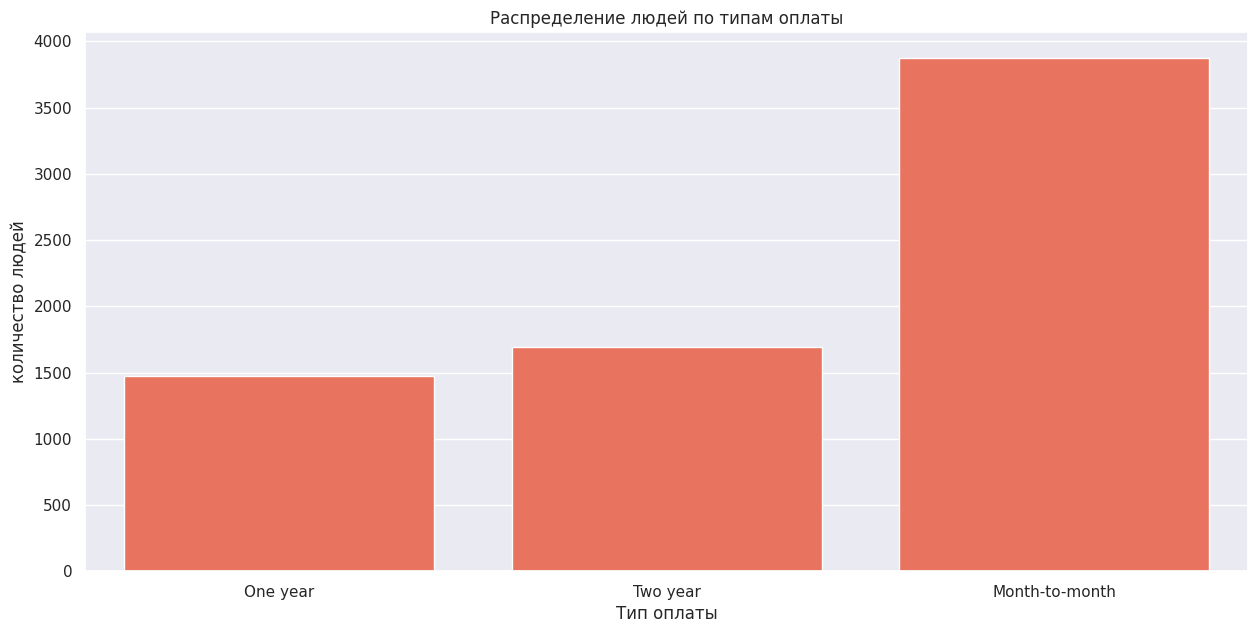

In [15]:
sns.set(rc={'figure.figsize': (15, 7)})
# смотрим на распределение типов оплаты
ax = sns.barplot(data=contract.groupby('Type', as_index=False).count().sort_values(by='EndDate'), \
                 x='Type', y='EndDate', color='tomato')
ax.set(title='Распределение людей по типам оплаты', xlabel='Тип оплаты', ylabel='количество людей');

Итак у нас есть три способа оплаты: Помесячно, на 1 год вперёд, на 2 года вперёд. Самый популярный из них - оплата помесячная. Такую оплату используют около 3900 человек. На втором месте по популярности - оплата на 2 года вперёд - её используют около 1700 человек и последняя по популярности - оплата на год вперёд. Её используют немногим менее 1500 человек.

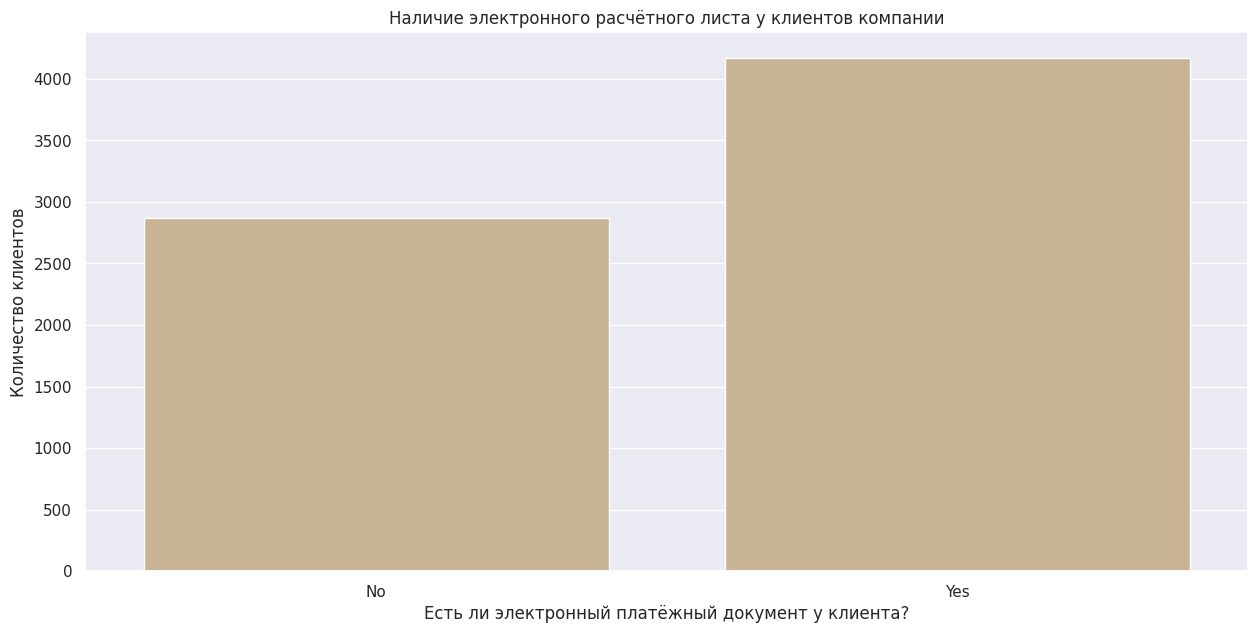

In [16]:
# смотрим на наличие электронного платёжного документа
ax = sns.barplot(data=contract.groupby('PaperlessBilling', as_index=False).count().sort_values(by='EndDate'), \
                 x='PaperlessBilling', y='EndDate', color='tan')
ax.set(title='Наличие электронного расчётного листа у клиентов компании', \
       xlabel='Есть ли электронный платёжный документ у клиента?', ylabel='Количество клиентов');

Первоначальное предположение, что электронный платёжный документ есть примерно у 60% клиентов довольно точное, ведь на самом деле он есть примерно у 59% клиентов (примерно 4150 человек). И у остальных - это около 2900 человек - его нет. Как правда, это влияет на факт ухода от обслуживания - пока не ясно.

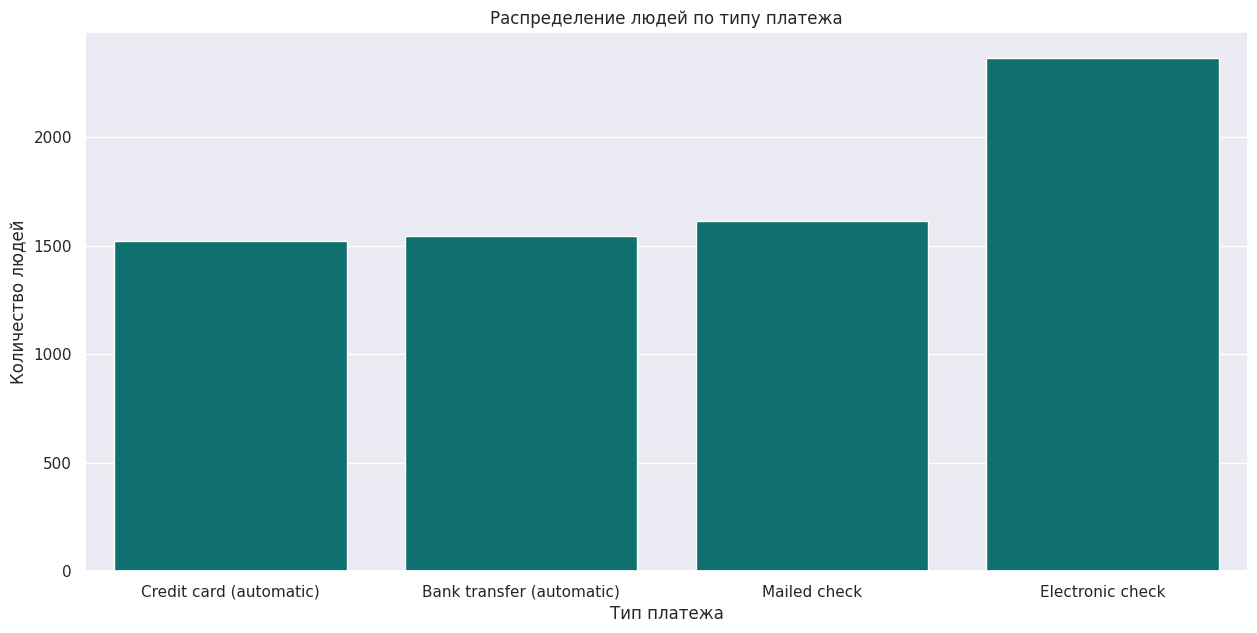

In [17]:
# смотрим на распределение по типу платежа
ax = sns.barplot(data=contract.groupby('PaymentMethod', as_index=False).count().sort_values(by='EndDate'), \
                 x='PaymentMethod', y='EndDate', color='teal')
ax.set(title='Распределение людей по типу платежа', xlabel='Тип платежа', ylabel='Количество людей');

По типу платежа самый популярный электронный платёж (примерно 2350 человек), далее следует почтовый платёж (примерно 1650 человек). А вот автоплатежи с банковской карты и кредитной карты не так популярны, хотя всё ещё очень значительны (немногим более 1500 человек пользуются каждым из этих 2 способов. Это также значит, что примерно 43% клиентов пользуются автоплатежами. Не так и мало.

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
5%         19.650000
25%        35.500000
50%        70.350000
75%        89.850000
80%        94.250000
95%       107.400000
max       118.750000
Name: MonthlyCharges, dtype: float64


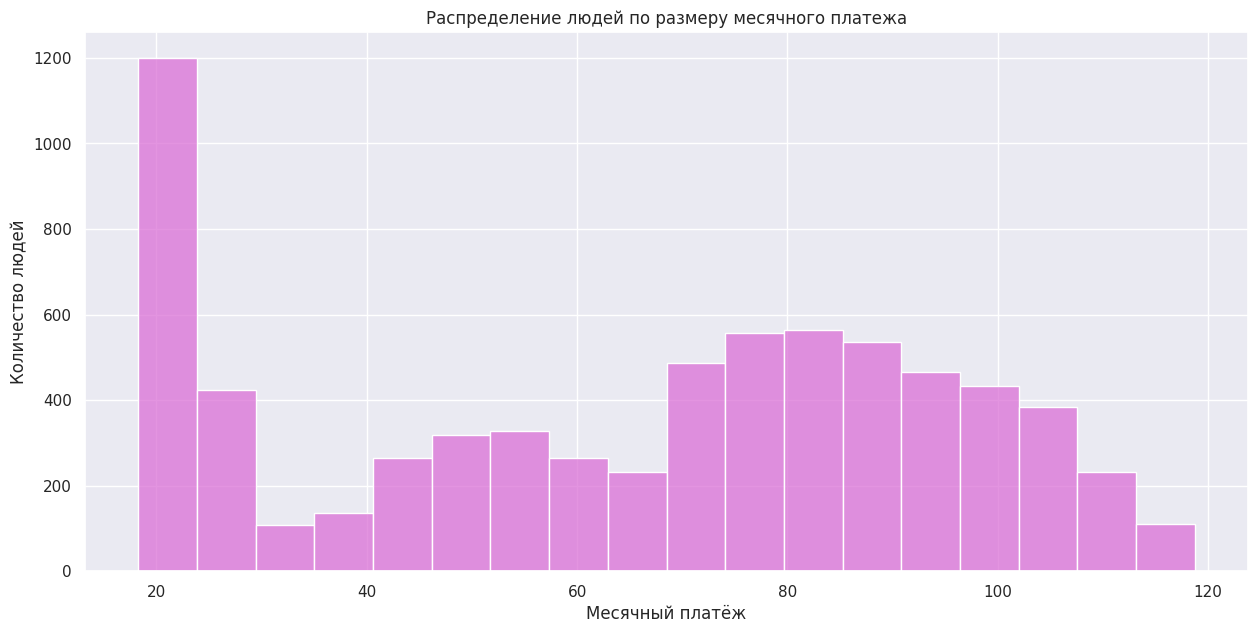

In [18]:
# смотрим на распределение по размер месячного платежа
ax = sns.histplot(data=contract.MonthlyCharges, color='orchid')
ax.set(title='Распределение людей по размеру месячного платежа', xlabel='Месячный платёж', ylabel='Количество людей');
print(contract.MonthlyCharges.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.8, 0.95]))

Размер месячного платежа колеблется от 18.25 до 118.75 долларов. При этом мода этого распределения находиться в пределах 20 долларов. При этом среднее составляет 64.76 долларов, медиана больше - 70.35. Связано это с большим разбросом значений. Также обращает внимание не очень большое количество людей с месячным платежом от 30 до примерно 70 долларов. Есть предположение, что это связано с тем , что большинство людей предпочитает брать интернет и/или телефонию без дополнительных услуг или уже с приличным количеством дополнительных опций.

count    7043.000000
mean     2115.312744
std      2112.742676
min         0.000000
5%         75.104999
25%       436.750000
50%      1343.349976
75%      3236.689941
80%      3844.870020
95%      6630.147070
max      9221.379883
Name: TotalCharges, dtype: float64


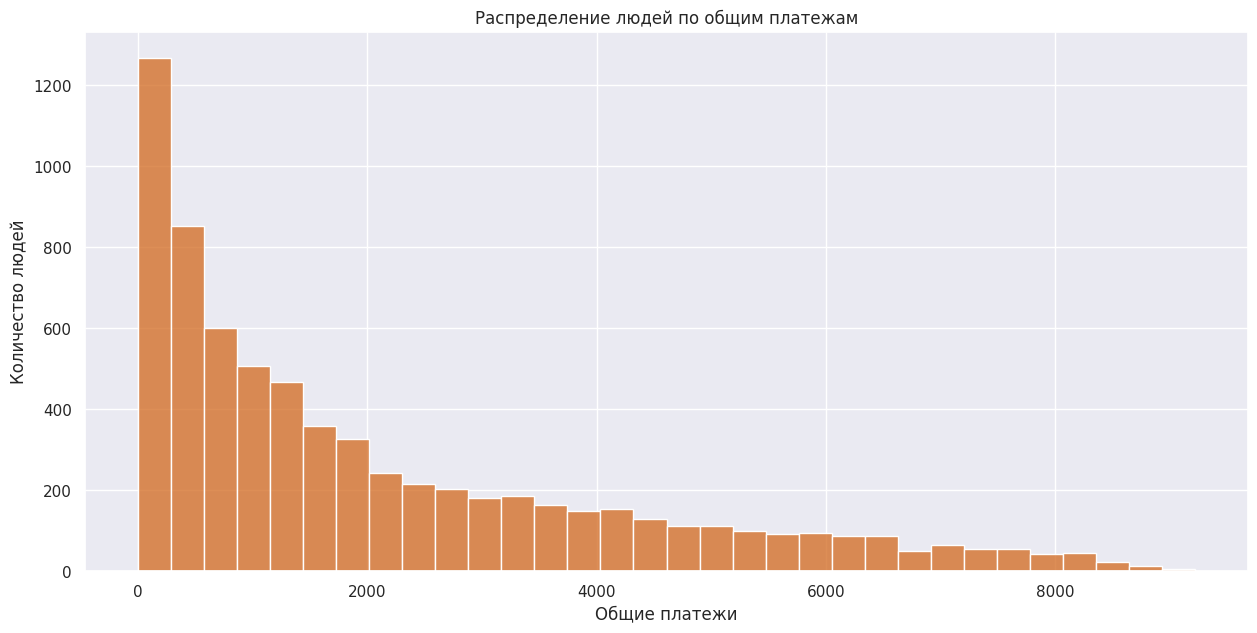

In [19]:
# смотрим на распределение по общим платежам
ax = sns.histplot(data=contract.TotalCharges, color='chocolate')
ax.set(title='Распределение людей по общим платежам', xlabel='Общие платежи', ylabel='Количество людей');
print(contract.TotalCharges.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.8, 0.95]))

Большинство клиентов принесли компании до 2000 долларов. Но заметен очень сильный разброс значений. Распредение нормальное. Как не вспомнить старое: 20% клиентов приносят 80% дохода - эдатакие старожилы. Но наличие новых клиентов - это всегда хорошо.

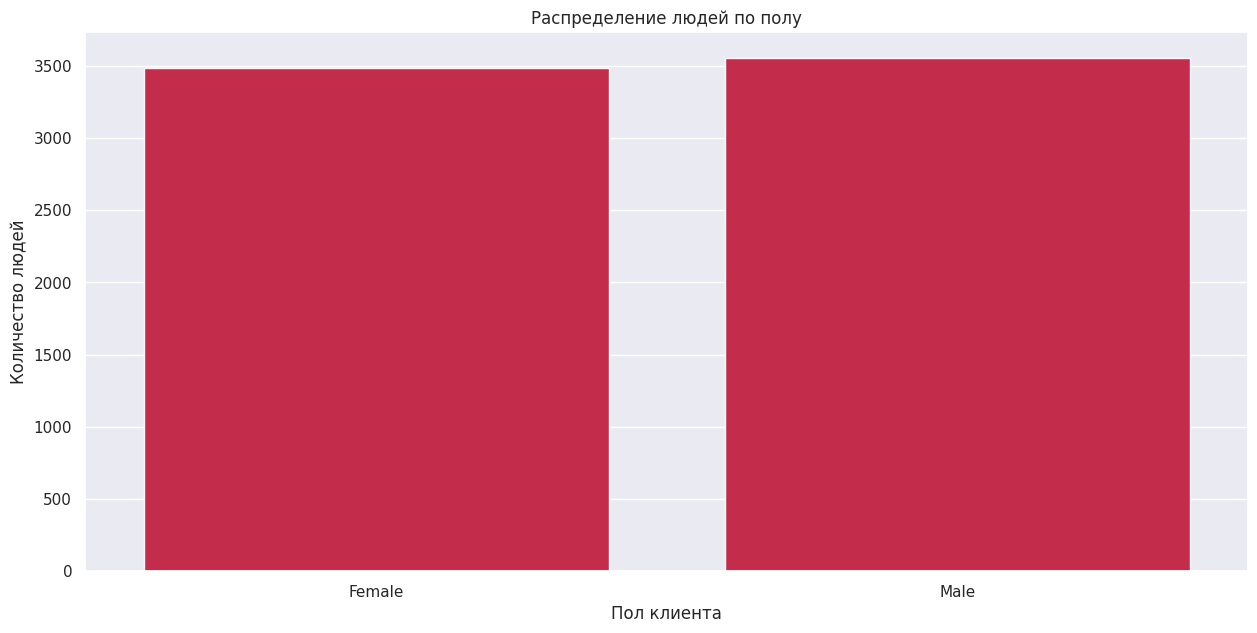

In [20]:
# смотрим на распределение по типу платежа
ax = sns.barplot(data=personal.groupby('gender', as_index=False).count().sort_values(by='customerID'), \
                 x='gender', y='customerID', color='crimson')
ax.set(title='Распределение людей по полу', xlabel='Пол клиента', ylabel='Количество людей');

Распределение людей по половому признаку примерно одинаково. Немного большее количество мужчин по сравнению с женщинами можно списать на случай.

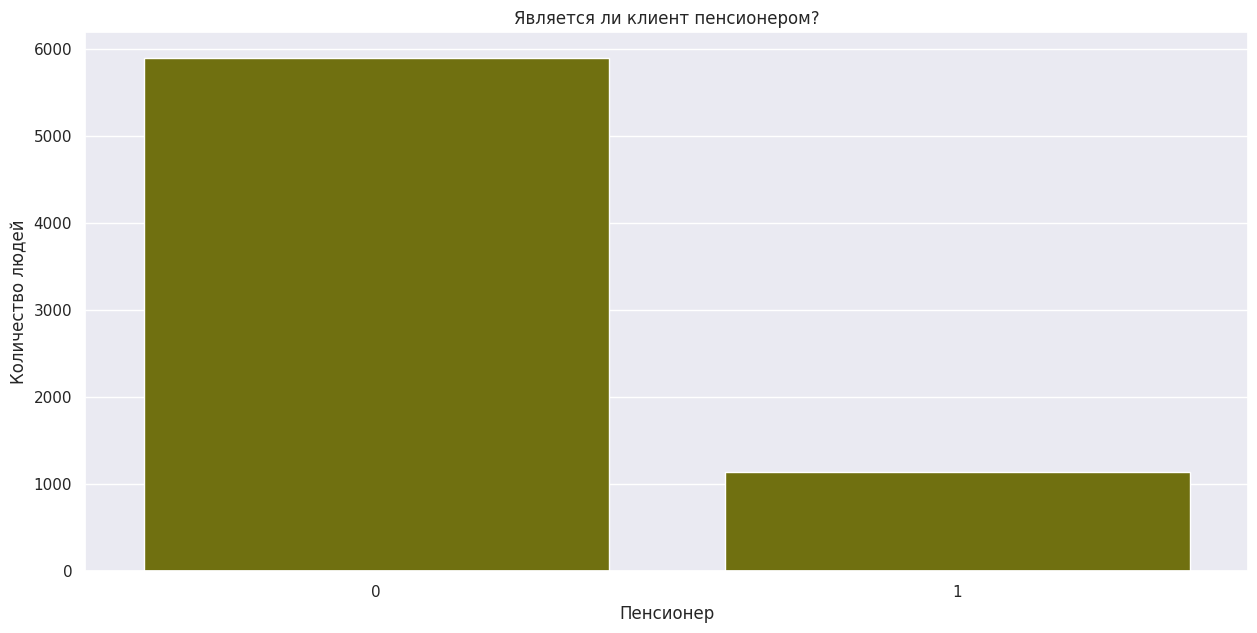

In [21]:
# смотрим на шанс, что наш клиент - пенсионер.
ax = sns.barplot(data=personal.groupby('SeniorCitizen', as_index=False).count().sort_values(by='customerID'), \
                 x='SeniorCitizen', y='customerID', color='olive')
ax.set(title='Является ли клиент пенсионером?', xlabel='Пенсионер', ylabel='Количество людей');

Шанс на то что наш клиент является пенсионером далеко не так низок как казалось по первой десятке клиентов и составляет немногим более 15%.

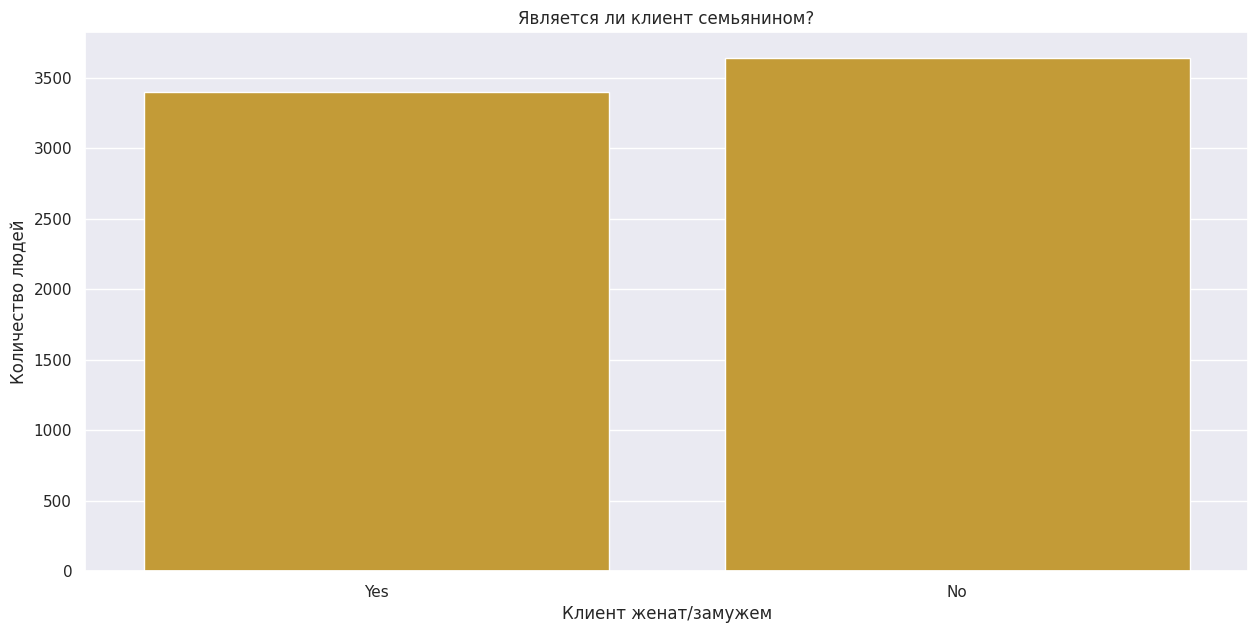

In [22]:
# смотрим на шанс, что наш клиент - женат/замужем.
ax = sns.barplot(data=personal.groupby('Partner', as_index=False).count().sort_values(by='customerID'), \
                 x='Partner', y='customerID', color='goldenrod')
ax.set(title='Является ли клиент семьянином?', xlabel='Клиент женат/замужем', ylabel='Количество людей');

Опять же наше прдположение, что среди наших клиентов будет всего около 20% людей, которые замужем/женатые явно не сбылось. Их немногим менее половины. Если исходить из графика их должно быть примерно 48%.

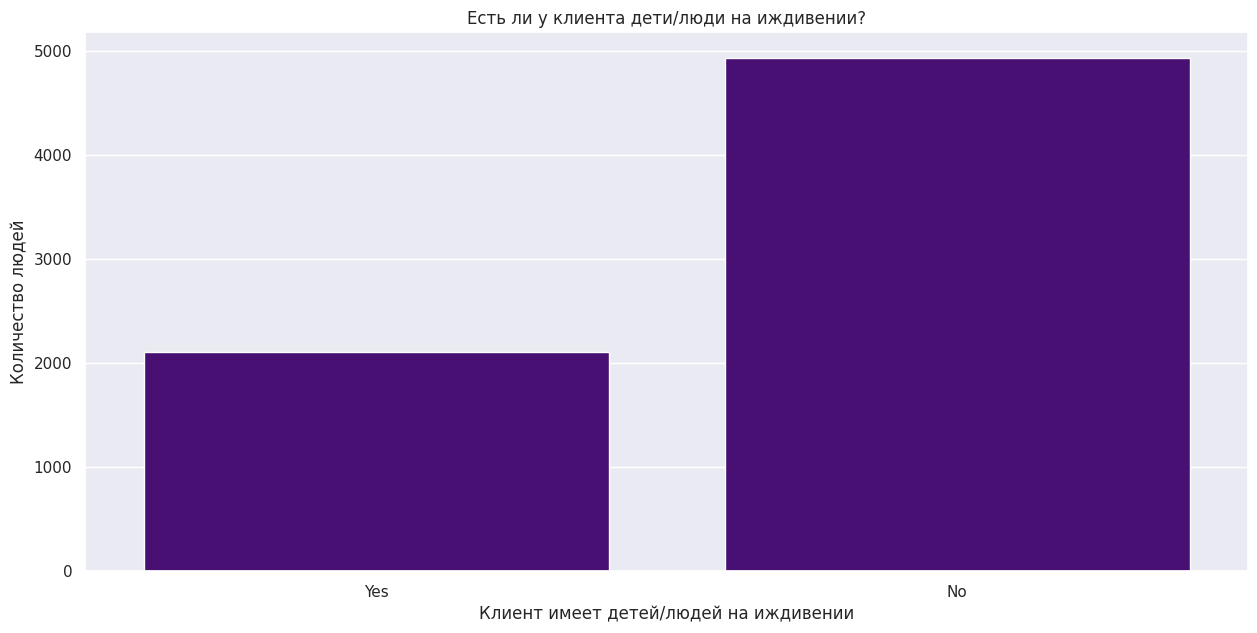

In [23]:
# смотрим на шанс, что наш клиент имеет детей или с людьми на иждивении .
ax = sns.barplot(data=personal.groupby('Dependents', as_index=False).count().sort_values(by='customerID'), \
                 x='Dependents', y='customerID', color='indigo')
ax.set(title='Есть ли у клиента дети/люди на иждивении?', xlabel='Клиент имеет детей/людей на иждивении', ylabel='Количество людей');

Опять же первая десятка людей оказалась не содержательна по количеству детей/людей на иждивении у клиента (напомним: мы ожидали увидеть детей/людей на иждивении примерно в 20% случаев). На самом деле длоля таких людей судя по графику немногим менее 30% от общего числа.

Далее надо объединять датафреймы для более конкретного анализа именно по услугам компании.

## Объединение данных в один большой датафрейм

Пора собирать данные в один большой датафрейм и правильно заполнить все образовавшиеся пропуски

In [24]:
telecom = contract.merge(personal, how='inner', on='customerID')
display(telecom.head(10))
print(telecom.shape)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.040001,Female,0,Yes,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.840088,Male,0,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.169998,Male,0,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.599976,Male,0,No,No
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.500000,Female,0,No,No
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.959961,Female,0,No,No
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.209961,Male,0,No,Yes
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.480011,Female,0,No,No
8,7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.679932,Female,0,Yes,No
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.349976,Male,0,No,Yes


(7043, 12)


Первое объединение успешно. Размер был одинаков (по строкам) и пробелов не было. Тут всё так же.

In [25]:
telecom = telecom.merge(internet, how='left', on='customerID')
display(telecom.head(10))

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.040001,Female,0,Yes,No,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.840088,Male,0,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.169998,Male,0,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.599976,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.500000,Female,0,No,No,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.959961,Female,0,No,No,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.209961,Male,0,No,Yes,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.480011,Female,0,No,No,DSL,Yes,No,No,No,No,No
8,7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.679932,Female,0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.349976,Male,0,No,Yes,DSL,Yes,Yes,No,No,No,No


In [26]:
print(telecom.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float32       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   5517 non-null   object        
 13  OnlineSecurity    5517 non-null   object        
 14  OnlineBackup      5517 n

Как и ожидалось - объединение должно было пройти с пропусками. Не все наши клиенты пользуются интернетом.

In [27]:
telecom = telecom.merge(phone, how='left', on='customerID')
display(telecom.head(10))
print(telecom.info())
print(telecom.shape)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.040001,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.840088,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.169998,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.599976,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.500000,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.959961,Female,0,No,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.209961,Male,0,No,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.480011,Female,0,No,No,DSL,Yes,No,No,No,No,No,NaN
8,7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.679932,Female,0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.349976,Male,0,No,Yes,DSL,Yes,Yes,No,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float32       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   5517 non-null   object        
 13  OnlineSecurity    5517 non-null   object        
 14  OnlineBackup      5517 n

Всё в порядке. Объединение успешно. Теперь, правда, у нас образовалось довольно много пустых значений (NaN) и с это предстоит исправить.

Но все эти пустые значения у нас находятся в дополнительных опциях или в способе подключения, то есть по факту зависят от того подключён ли вообще интернет или телефон. Это наталкивает на мысль о замене пропусков (всех) техническим значением, которое будет означать техническую невозможность оказания данной дополнительной услуги. Назначим этим техническим значением 'NoTechOpportunity'.

In [28]:
# ставим вместо пропусков техническое значение ('NoTechOpportunity') и проверяем всё ли заполнилось.
telecom = telecom.fillna('NoTechOpportunity')
display(telecom.head(10))
print(telecom.info())

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.040001,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NoTechOpportunity
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.840088,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.169998,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.599976,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NoTechOpportunity
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.500000,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.959961,Female,0,No,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.209961,Male,0,No,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.480011,Female,0,No,No,DSL,Yes,No,No,No,No,No,NoTechOpportunity
8,7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.679932,Female,0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.349976,Male,0,No,Yes,DSL,Yes,Yes,No,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   object        
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float32       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup      7043 n

Всё успешно. Пора продолжать анализ анализ данных и создавать новые признаки.

## Исследовательский анализ и преобработка данных большого (объединённого) датафрейма

В этой части мы будем создавать новые признаки и приводить исследовательский анализ данных дальше.

In [29]:
# создадим технические признаки подключен ли интернет и подключен ли телефон (по аналогии: со значениями Yes и No)
def connect_internet(InternetService):
    # создаёт столбец со значениями Yes и No для интернет соединения
    if InternetService != 'NoTechOpportunity':
        return 'Yes'
    else:
        return 'No'

def connect_phone(MultipleLines):
    # создаёт столбец со значениями Yes и No для услуги телефонии
    if MultipleLines != 'NoTechOpportunity':
        return 'Yes'
    else:
        return 'No'

telecom['internet'] = telecom.InternetService.apply(connect_internet)
telecom['phone'] = telecom.MultipleLines.apply(connect_phone)
display(telecom.head(10))
print(telecom['internet'].unique())

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,internet,phone
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.040001,Female,0,...,DSL,No,Yes,No,No,No,No,NoTechOpportunity,Yes,No
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.840088,Male,0,...,DSL,Yes,No,Yes,No,No,No,No,Yes,Yes
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.169998,Male,0,...,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.599976,Male,0,...,DSL,Yes,No,Yes,Yes,No,No,NoTechOpportunity,Yes,No
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.500000,Female,0,...,Fiber optic,No,No,No,No,No,No,No,Yes,Yes
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.959961,Female,0,...,Fiber optic,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.209961,Male,0,...,Fiber optic,No,Yes,No,No,Yes,No,Yes,Yes,Yes
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.480011,Female,0,...,DSL,Yes,No,No,No,No,No,NoTechOpportunity,Yes,No
8,7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.679932,Female,0,...,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.349976,Male,0,...,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes


['Yes' 'No']


Это неплохие признаки, но их недостаточно. Продолжаем.

In [30]:
# создаём функиции для создания новых столбцов
def months_use(row):
    """ для расчёта месяцев сколько клиент уже с нами.
    Округление нужно для учёта скидок/штрафов. """
    if row['EndDate'] == 'No':
        now = pd.to_datetime('2020-02-01', format='%Y-%m-%d')
        return round((now - row['BeginDate'])/np.timedelta64(1, 'M'))
    else:
        now = pd.to_datetime(row['EndDate'], format='%Y-%m-%d')
        return round((now - row['BeginDate'])/np.timedelta64(1, 'M'))

def use_service(row):
    ''' Отвечает на вопрос какие услуги использует наш клиент'''
    if row['internet'] == 'Yes' and row['InternetService'] == 'DSL' and row['phone'] == 'No':
        return 'internet, DSL'
    elif row['internet'] == 'Yes' and row['InternetService'] == 'Fiber optic' and row['phone'] == 'No':
        return 'internet, optic'
    elif row['internet'] == 'No' and row['phone'] == 'Yes':
        return 'phone'
    elif row['internet'] == 'Yes' and row['InternetService'] == 'DSL' and row['phone'] == 'Yes':
        return 'internet, DSL + phone'
    else:
        return 'internet, optic + phone'

def additional_options(row):
    ''' Отвечает на вопрос сколько дополнительных опций использует клиент. '''
    count = 0
    columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', \
               'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']
    for column in columns:
        if row[column] == 'Yes':
            count += 1
    return count

def get_discount(row):
    # Отвечает на вопрос - что получал ли клиент скидку (Yes), не получал (No) или наоброт получал штраф (Fine)
    if row['MonthlyCharges'] * row['duration'] > row['TotalCharges']:
        return 'Yes'
    elif row['MonthlyCharges'] * row['duration'] < row['TotalCharges']:
        return 'Fine'
    else:
        return 'No'

def days_use(row):
    """ для расчёта дней сколько клиент уже с нами.
    Округление нужно для учёта скидок/штрафов. """
    if row['EndDate'] == 'No':
        now = pd.to_datetime('2020-02-01', format='%Y-%m-%d')
        return round((now - row['BeginDate'])/np.timedelta64(1, 'D'))
    else:
        now = pd.to_datetime(row['EndDate'], format='%Y-%m-%d')
        return round((now - row['BeginDate'])/np.timedelta64(1, 'D'))

# применяем и смотрим, что вышло
telecom['duration'] = telecom.apply(months_use, axis=1)
telecom['service'] = telecom.apply(use_service, axis=1)
telecom['add_options'] = telecom.apply(additional_options, axis=1)
telecom['discount'] = telecom.apply(get_discount, axis=1)
telecom['duration_days'] = telecom.apply(days_use, axis=1)
# создаём новый признак - год заключения контракта с клиентом
telecom['begin_year'] = telecom.BeginDate.dt.year
display(telecom.head(10))

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,StreamingMovies,MultipleLines,internet,phone,duration,service,add_options,discount,duration_days,begin_year
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.040001,Female,0,...,No,NoTechOpportunity,Yes,No,1,"internet, DSL",1,Fine,31,2020
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.840088,Male,0,...,No,No,Yes,Yes,34,"internet, DSL + phone",2,Fine,1036,2017
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.169998,Male,0,...,No,No,Yes,Yes,4,"internet, DSL + phone",2,Fine,123,2019
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.599976,Male,0,...,No,NoTechOpportunity,Yes,No,45,"internet, DSL",3,Fine,1371,2016
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.500000,Female,0,...,No,No,Yes,Yes,5,"internet, optic + phone",0,No,153,2019
5,9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.959961,Female,0,...,Yes,Yes,Yes,Yes,11,"internet, optic + phone",4,Fine,337,2019
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.209961,Male,0,...,No,Yes,Yes,Yes,22,"internet, optic + phone",3,Fine,671,2018
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.480011,Female,0,...,No,NoTechOpportunity,Yes,No,10,"internet, DSL",1,Fine,306,2019
8,7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.679932,Female,0,...,Yes,Yes,Yes,Yes,31,"internet, optic + phone",5,Fine,945,2017
9,6388-TABGU,2014-12-01,2017-05-01,One year,No,Bank transfer (automatic),56.15,1628.349976,Male,0,...,No,No,Yes,Yes,29,"internet, DSL + phone",2,Yes,882,2014


Надо создать целовой признак из столбца EndDate и столбец SeniorCitizen сделать не численным, а строкой. Это по сути категориальный признак.

In [31]:
def create_target(EndDate):
    # создаём целевой признак (у нас его нету)
    if EndDate == 'No':
        return 0
    else:
        return 1

telecom['EndDate'] = telecom.EndDate.apply(create_target)

In [32]:
telecom['SeniorCitizen'] = telecom['SeniorCitizen'].astype('str')
# смотрим на результаты
display(telecom.head(10))
print(telecom.info())

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,StreamingMovies,MultipleLines,internet,phone,duration,service,add_options,discount,duration_days,begin_year
0,7590-VHVEG,2020-01-01,0,Month-to-month,Yes,Electronic check,29.85,31.040001,Female,0,...,No,NoTechOpportunity,Yes,No,1,"internet, DSL",1,Fine,31,2020
1,5575-GNVDE,2017-04-01,0,One year,No,Mailed check,56.95,2071.840088,Male,0,...,No,No,Yes,Yes,34,"internet, DSL + phone",2,Fine,1036,2017
2,3668-QPYBK,2019-10-01,0,Month-to-month,Yes,Mailed check,53.85,226.169998,Male,0,...,No,No,Yes,Yes,4,"internet, DSL + phone",2,Fine,123,2019
3,7795-CFOCW,2016-05-01,0,One year,No,Bank transfer (automatic),42.30,1960.599976,Male,0,...,No,NoTechOpportunity,Yes,No,45,"internet, DSL",3,Fine,1371,2016
4,9237-HQITU,2019-09-01,0,Month-to-month,Yes,Electronic check,70.70,353.500000,Female,0,...,No,No,Yes,Yes,5,"internet, optic + phone",0,No,153,2019
5,9305-CDSKC,2019-03-01,0,Month-to-month,Yes,Electronic check,99.65,1150.959961,Female,0,...,Yes,Yes,Yes,Yes,11,"internet, optic + phone",4,Fine,337,2019
6,1452-KIOVK,2018-04-01,0,Month-to-month,Yes,Credit card (automatic),89.10,2058.209961,Male,0,...,No,Yes,Yes,Yes,22,"internet, optic + phone",3,Fine,671,2018
7,6713-OKOMC,2019-04-01,0,Month-to-month,No,Mailed check,29.75,300.480011,Female,0,...,No,NoTechOpportunity,Yes,No,10,"internet, DSL",1,Fine,306,2019
8,7892-POOKP,2017-07-01,0,Month-to-month,Yes,Electronic check,104.80,3573.679932,Female,0,...,Yes,Yes,Yes,Yes,31,"internet, optic + phone",5,Fine,945,2017
9,6388-TABGU,2014-12-01,1,One year,No,Bank transfer (automatic),56.15,1628.349976,Male,0,...,No,No,Yes,Yes,29,"internet, DSL + phone",2,Yes,882,2014


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   int64         
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float32       
 8   gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   object        
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup      7043 n

Пора продолжать анализ данных.

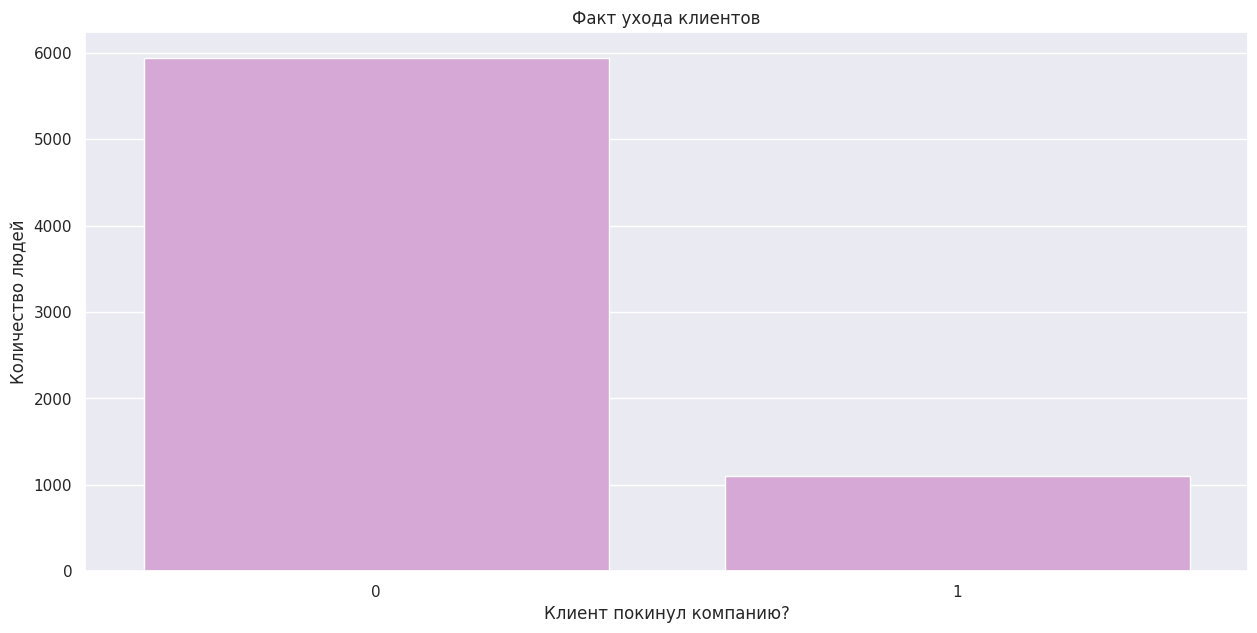

In [33]:
# смотрим на соотношение оставшихся и ушедших клиентов
ax = sns.barplot(data=telecom.groupby('EndDate', as_index=False).count(), \
                 x='EndDate', y='customerID', color='plum')
ax.set(title='Факт ухода клиентов', xlabel='Клиент покинул компанию?', ylabel='Количество людей');

Итак за всё время мы потеряли примерно 1100 клиентов. Что составляет примерно 15.6% от общего числа пользователей. У нас налицо явный дисбаланс классов и для правильного обучения моделей нужно будет ставить `class_weigh='balanced'` для улучшения качества улучшения обучения моделей. Но в данной задаче это не обязательно - метрика ROC-AUC не чувствительна к дисбалансу классов.

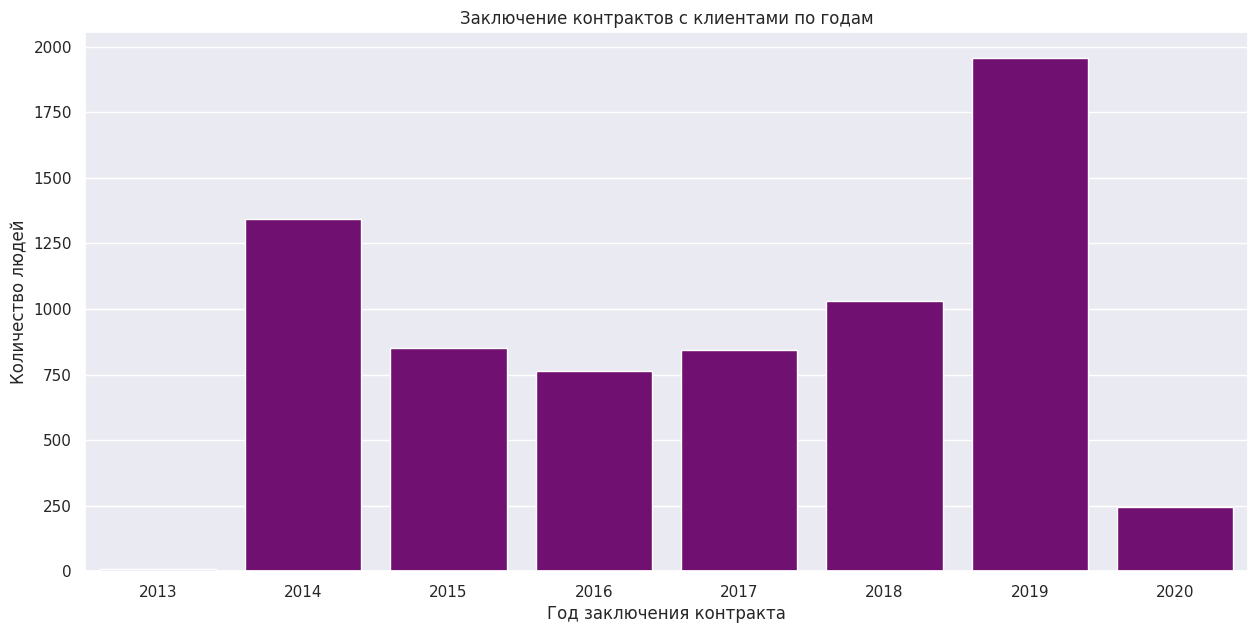

In [34]:
# график - заключение контрактов с клиентами по годам
ax = sns.barplot(data=telecom.groupby('begin_year', as_index=False).count(), \
                 x='begin_year', y='customerID', color='purple')
ax.set(title='Заключение контрактов с клиентами по годам', xlabel='Год заключения контракта', ylabel='Количество людей');

Самые активные заключения контрактов были в 2014 году и в 2019 году. В 2013 году из почти не было почти не было контрактов. Потом в 2015-2016 году спад коичества заключённых контрактов. С 2017 наблюдается рост контрактов. Но в 2019 году, как ровно и в 2014 похоже были акции по привлечению новых клиентов и притом крупные.

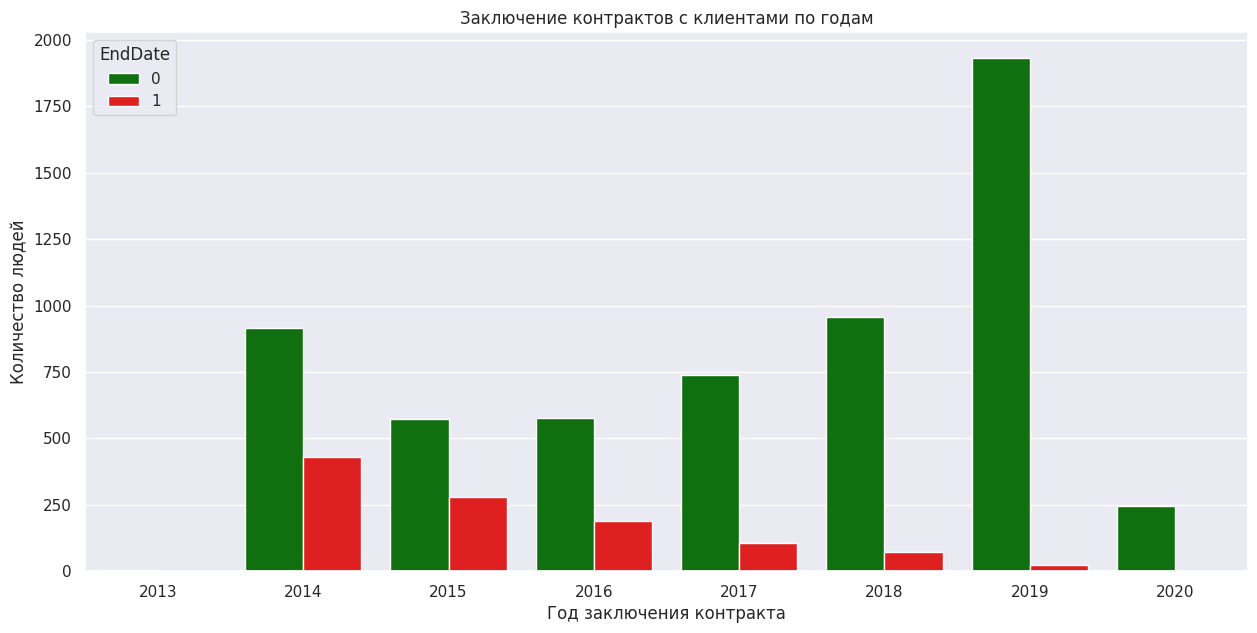

In [35]:
# график - заключение контрактов с клиентами по годам (с разбивкой на ушёл клиент или нет)
ax = sns.barplot(data=telecom.groupby(['begin_year', 'EndDate'], as_index=False).count(), \
                 x='begin_year', y='customerID', hue='EndDate', palette=['green', 'red'])
ax.set(title='Заключение контрактов с клиентами по годам', xlabel='Год заключения контракта', ylabel='Количество людей');

У нас почти прямая зависимость! С ростом года вероятность уйти резко снижается. Среди клиентов заключивших контракт в 2014 году таких клиентов много, а дальше их абсолютное количество снижается и среди заключивших контракты в 2017-2020 годах этих людей уже очень невелика, в то время как количество клиентов растёт. Отличный признак, крайне необходимый для результатов анализа! Но сразу скажем: только для ручного определения. В модели машинного обучения такой признак передавать нельзя - что будет выдавать наша модель при поступлении годов намного больших, чем 2020. Например - 2030+ год. Качество может у моделей в этом скачае хромать.

count    7043.000000
mean       29.495385
std        22.446726
min         0.000000
5%          2.000000
25%         9.000000
50%        25.000000
75%        48.000000
80%        53.000000
95%        71.000000
max        76.000000
Name: duration, dtype: float64


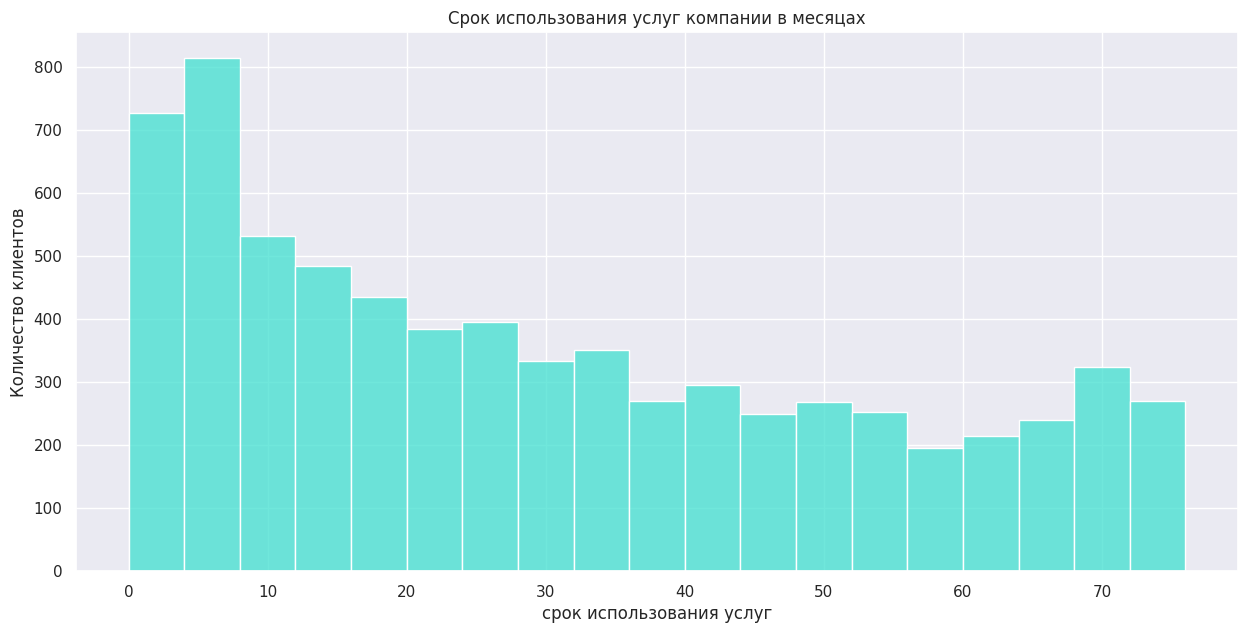

In [36]:
# распределение всех наших клиентов по времени использования наших услуг
ax = sns.histplot(telecom.duration, color='turquoise')
ax.set(title='Срок использования услуг компании в месяцах', xlabel='срок использования услуг', ylabel='Количество клиентов');
print(telecom.duration.describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.8, 0.95]))

Средний срок использования услуг компании у клиентов составляет 2.5 года. Медианное значение меньше - 2 года и 2 месяца. Надо сказать, что наблюдается довольно большой разброс в данных от совсем новых клиентов до "старожилов", которые пользуются нашими услугами более 6 лет. Притом заметим, что последних далеко не так мало как могло показатся сначала.

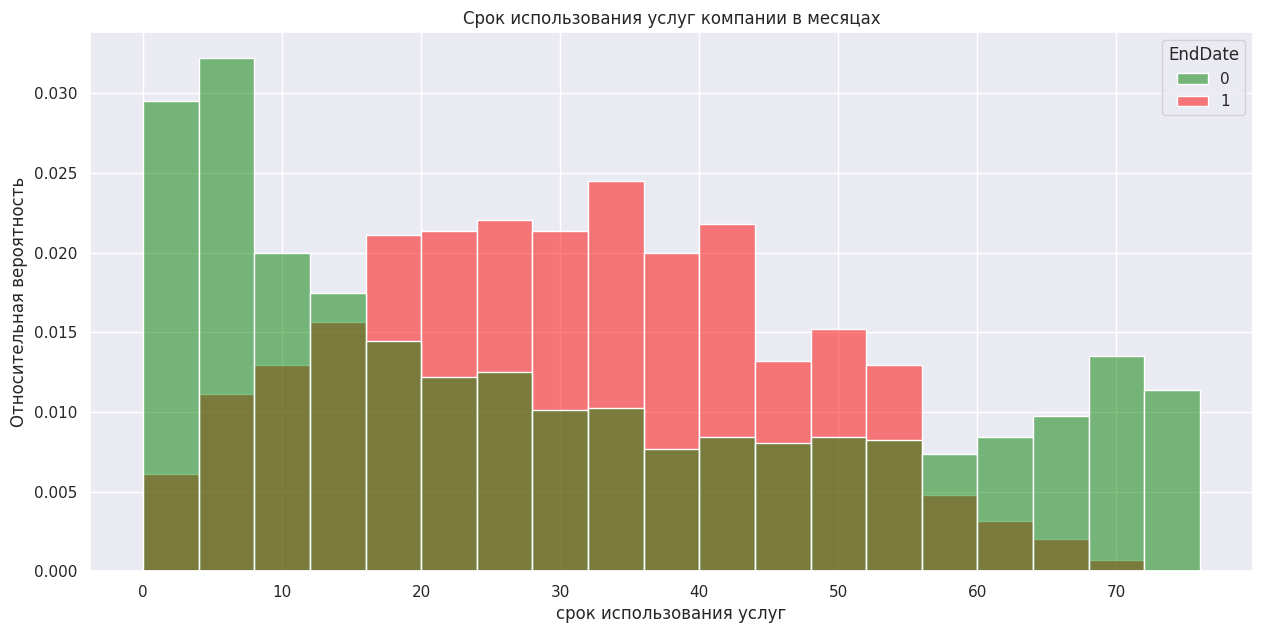

In [37]:
# распределение всех наших клиентов по времени использования наших услуг
ax = sns.histplot(data=telecom, stat='density', common_norm=False, x='duration', hue='EndDate', palette=['green','red'])
ax.set(title='Срок использования услуг компании в месяцах', xlabel='срок использования услуг', ylabel='Относительная вероятность');

Относительная вероятность остаться клиентом компании начинает понижаться примерно с 10 месяцев, достигая минимума к 40 месяцам и оставаясь на этом уровне примерно до 60 месяцев, потом же шанс остаться клиентом клиентом компании начинает увеличиваться. С Относительно вероятности уйти - тут ситуация совсем иная: растёт примерно до 18 месяцев, далее остаётся на уровне примерно до 44 месяцев, затем эта относительная вероятность начинает снижаться. Особенно это становиться заметно приерно с 56 месяцев в компании. После 70 месяцев в качестве клиента компании вероятность уйти практически обнуляется.

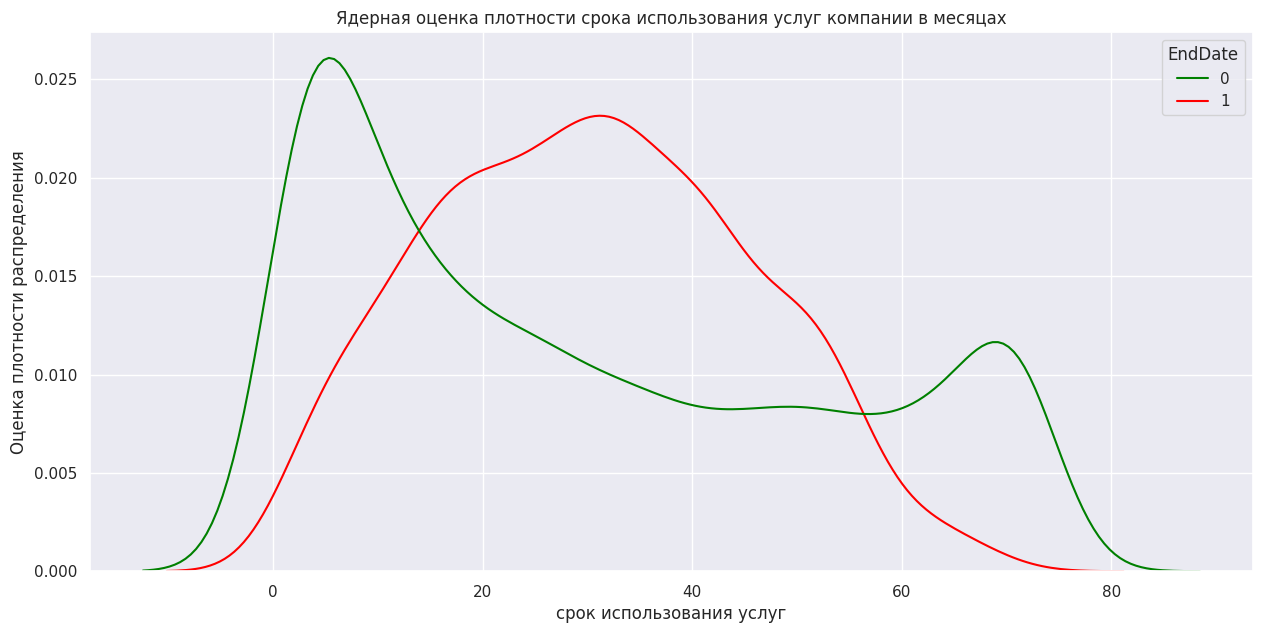

In [38]:
# распределение всех наших клиентов по времени использования наших услуг
ax = sns.kdeplot(data=telecom, common_norm=False, x='duration', hue='EndDate', palette=['green','red'])
ax.set(title='Ядерная оценка плотности срока использования услуг компании в месяцах', \
       xlabel='срок использования услуг', ylabel='Оценка плотности распределения');

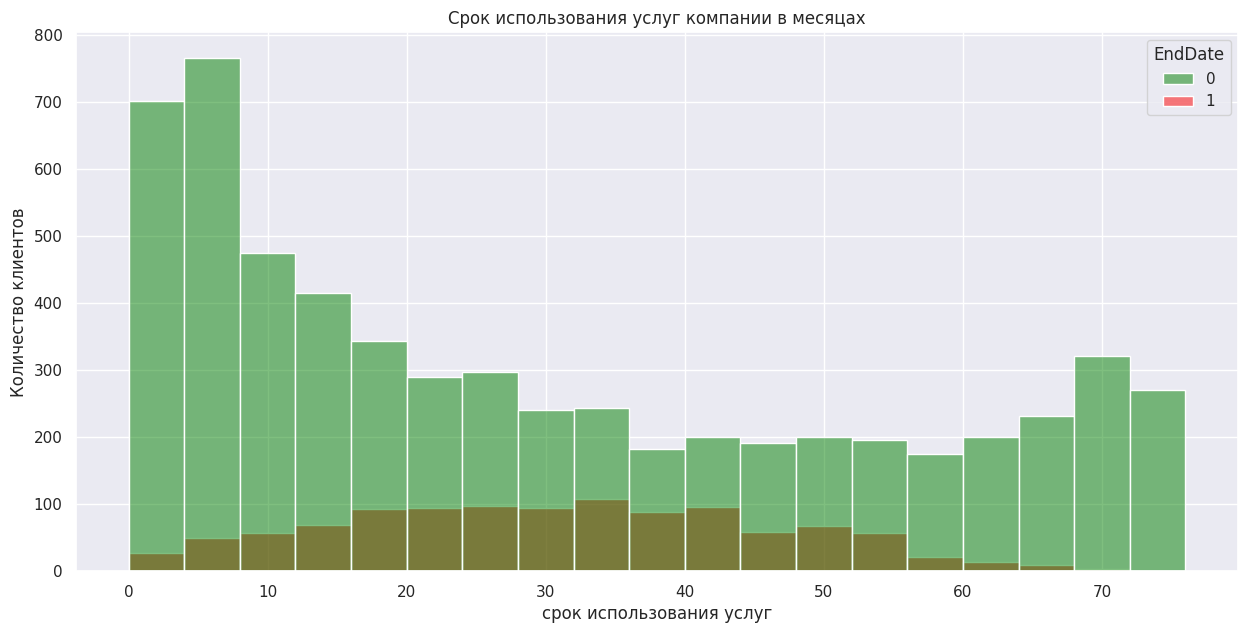

In [39]:
# распределение всех наших клиентов по времени использования наших услуг
ax = sns.histplot(data=telecom, x='duration', hue='EndDate', palette=['green','red'])
ax.set(title='Срок использования услуг компании в месяцах', xlabel='срок использования услуг', ylabel='Количество клиентов');

Наибольшая вероятность ухода из компании возникает в период немногим более 30 месяцев (около 2.5 лет) пользования услугами компании. До этого времени вероятность немного растёт, а затем падает. Если же клиент использует услуги компании свыше 60 месяцев (5 лет), то шанс на то, что он перестанет пользоваться услугами компании становиться минимальной. Так же отметим, что вероятность перестать пользоваться услугами компании до 15 месяцев не очень велика. Особое внимание надо уделить клиентам компании, которые пользуются услугами от 15 месяцев (1 год 3 месяца) до 45 месяцев (3 года 9 месяцев). По относительным показателям наиболее "опасный" период - от 36 до 44 месяцев пользования услугами нашей компании. Здесь вероятность ухода клиента - примерно 1/3(! - 33%) при средней вероятности в 15.6%. Вероятно это связано с тем, что в это время во-первых не очень много клиентов как таковых, а во-вторых клиент, скорее всего, активно ищет альтернативы.

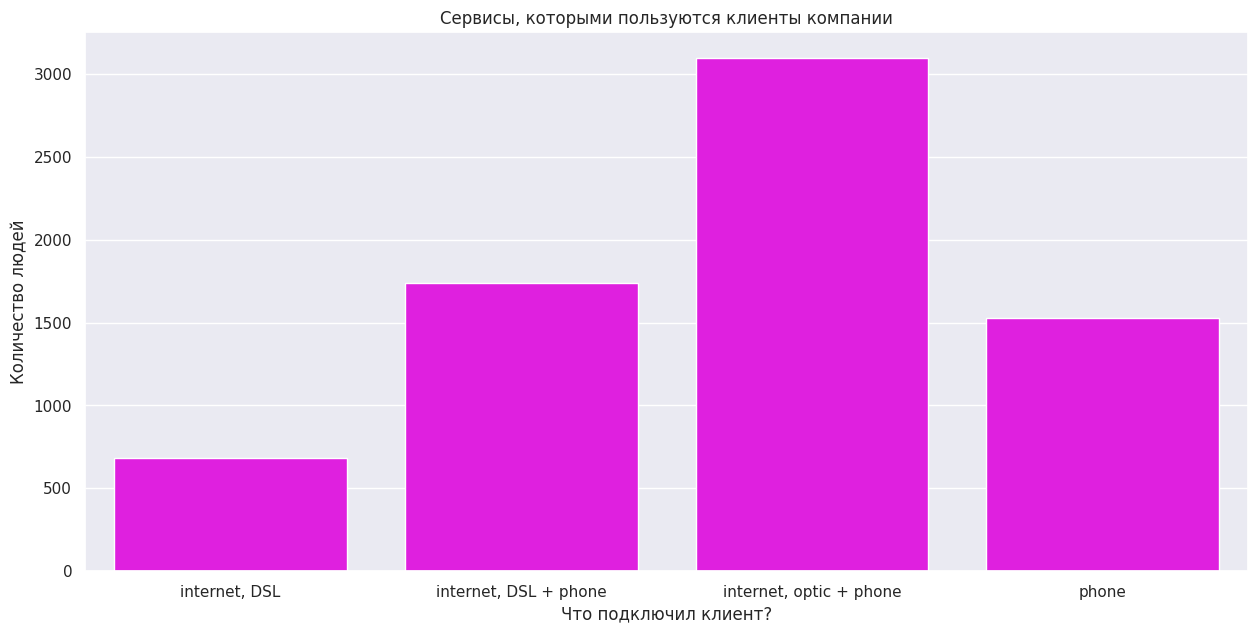

In [40]:
# смотрим на услуги, которыми пользуются клиенты компании
ax = sns.barplot(data=telecom.groupby('service', as_index=False).count(), \
                 x='service', y='customerID', color='magenta')
ax.set(title='Сервисы, которыми пользуются клиенты компании', xlabel='Что подключил клиент?', ylabel='Количество людей');

А вот и сюрприз! Никто не подключил просто интернет по оптоволоконному кабелю без подключения телефона. Это немного удивляет. В любом случае самый популярный вариант - интернет по оптоволоконному кабелю + телефон. Таким вариантом пользуются примерно 44% пользователей. Второй вариант по популярности по цифровой абоненской линии и подключенный телефон. Этим  способом пользуются немногим более 24% пользователей. Просто телефоном пользуются примерно 22% пользователей и оставшиеся около 10% пользователей пользуются интернетом по цифровой абоненской линии. Как это влияет на риск отказа от услуг компании? Попробуем понять.

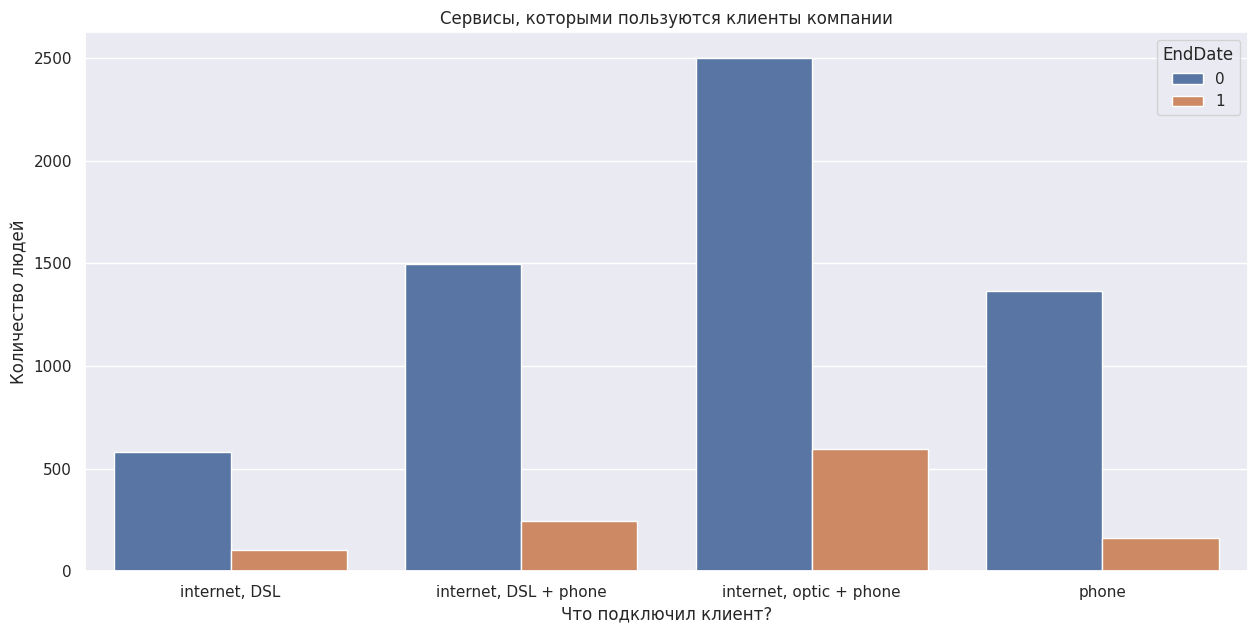

In [41]:
# смотрим на услуги, которыми пользуются клиенты компании с учётом факта ухода
ax = sns.barplot(data=telecom.groupby(['service', 'EndDate'], as_index=False).count(), \
                 x='service', y='customerID',hue='EndDate')
ax.set(title='Сервисы, которыми пользуются клиенты компании', xlabel='Что подключил клиент?', ylabel='Количество людей');

Итак примерные относительные шансы покинуть компанию: при интернете по цифровой оптической линии - примерно 1/7 (14,3%). При интернете по цифровой линии и подключенном телефоне возможность покинуть примерно 2/17 (11,8%). При интернете по оптической линии и подключенном телефоне возможность покинуть компанию возрастает до 6/31 (19,4%). И просто при подключенном телефоне эта возможность составляет примерно 9,6%.

Т.е. можно сказать, что при подключении интернета по оптической линии и телефона значительно возрастает шанс ухода нашего клиента по сравнению с остальными вариантами. Можно предположить, что это связано с ценой услуг - но это требует подтверждения.

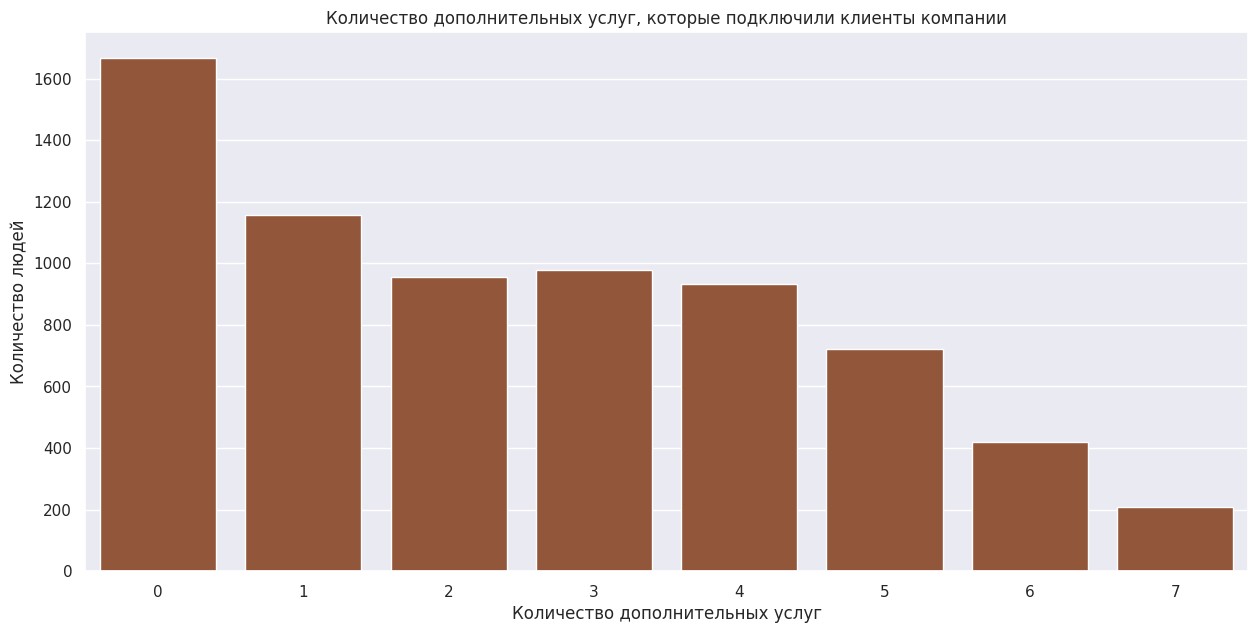

In [42]:
# сколько дополнительных услуг подключено?
ax = sns.barplot(data=telecom.groupby('add_options', as_index=False).count(), \
                 x='add_options', y='customerID', color='sienna')
ax.set(title='Количество дополнительных услуг, которые подключили клиенты компании',\
       xlabel='Количество дополнительных услуг', ylabel='Количество людей');

Пока что ничего не обычного - чем больше число дополнительных услуг подключено, тем меньшее число людей их подключило. И чаще всего люди не используют дополнительные услуги вообще. Таких людей среди клиентов компании примерно 23,6%. Ещё примерно 16,4% всех клиентов подключили 1 дополнительную услугу. Примерно по 13,5% клиентов используют от 2 до 4 дополнительных услуг. 5 дополнительных услуг клиенты используют в 10,6% случаев, 6 - примерно в 5,9% случаев. Все 7 дополнительных услуг используют клиенты примерно в 2,9%. Как это влияет на вероятность ухода? Оценим далее.

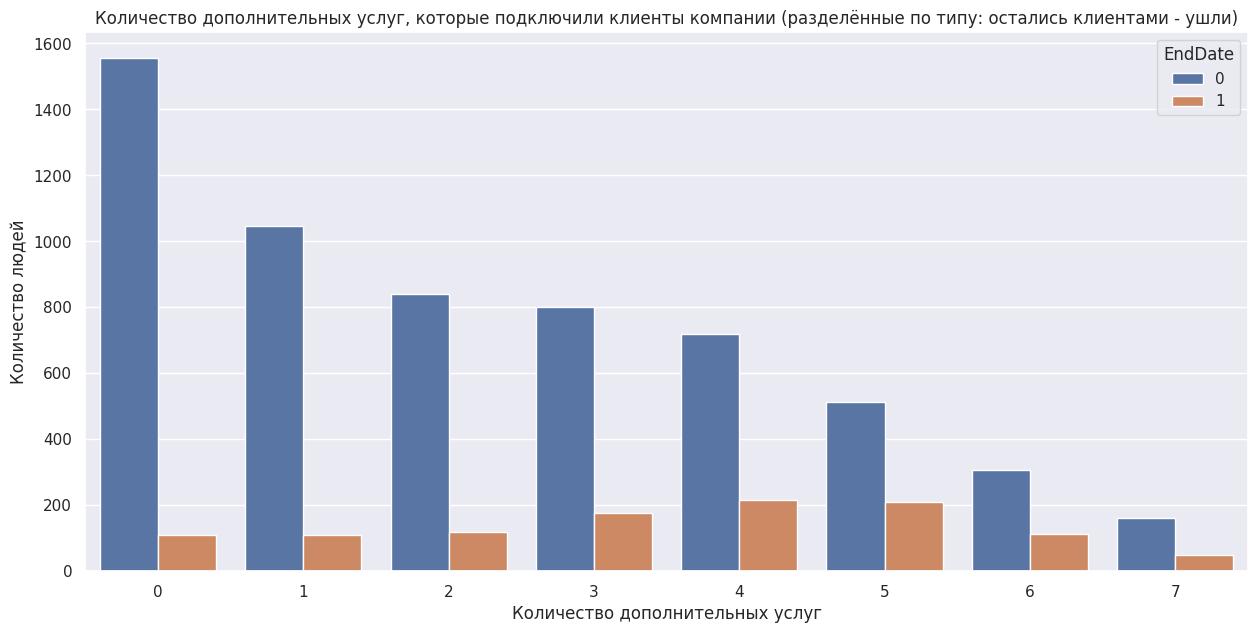

In [43]:
# сколько дополнительных услуг подключено?
ax = sns.barplot(data=telecom.groupby(['add_options', 'EndDate'], as_index=False).count(), \
                 x='add_options', y='customerID', hue='EndDate')
ax.set(title='Количество дополнительных услуг, которые подключили клиенты компании (разделённые по типу: остались клиентами - ушли)',\
       xlabel='Количество дополнительных услуг', ylabel='Количество людей');

Если можно было бы предположить изначально, что тем больше человек подключил дополнительных услуг тем меньше он захочет нас покидать - то практика говорит о строго обратном. Тем больше клиент подключил дополнительных услуг - тем больше он может захотеть уйти от компании. Можно предположить, это связано с довольно высокими ценами на услуги интернета/телефонии и довольно дорогими дополнительными услугами. Языком сухих цифр: примерно 6% клиентов уходят от компании без дополнительных услуг, с 1 дополнительной услугой таких клиентов 8,7%, с 2 - 11,8%, с 3 - 18,3%, с 4 - 22,3%, с 5 - 28,9%, с 6 - 25%, с 7 - примерно 22%. Таким образом можно сказать, что люди с 4 или большим количеством дополнительных услуг находяться в "зоне риска" и шанс выхода этих людей довольно велик.

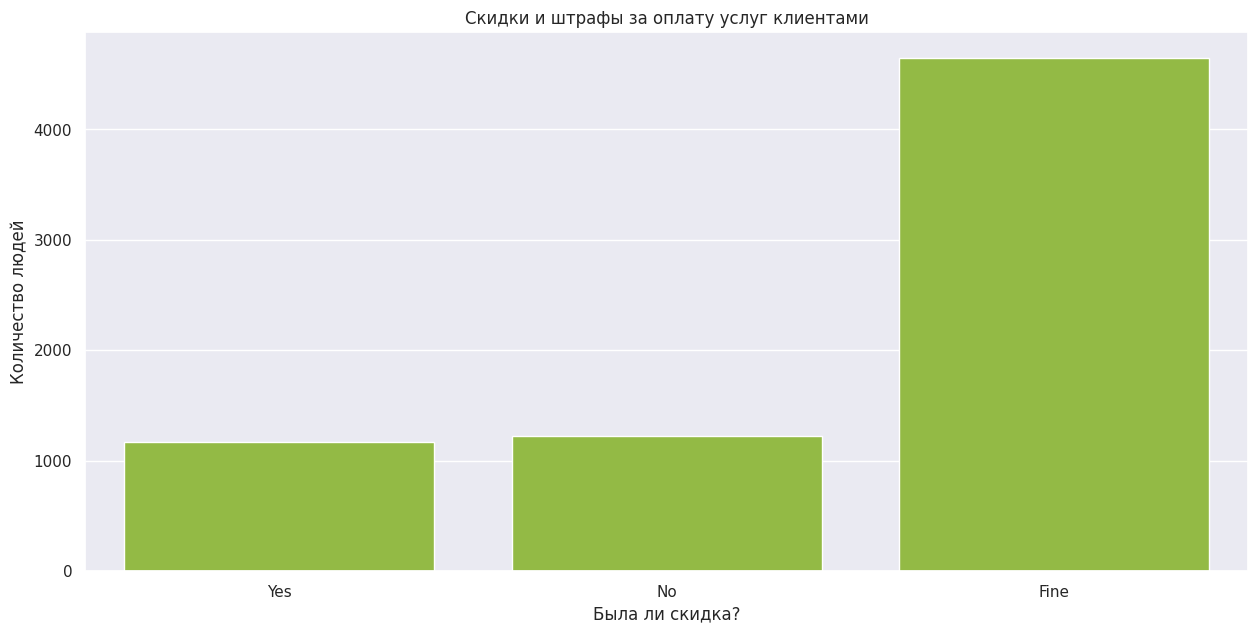

In [44]:
# смотрим на шанс получить скидку от компании или же наоборот штраф от неё
ax = sns.barplot(data=telecom.groupby('discount', as_index=False).count().sort_values(by='customerID'), \
                 x='discount', y='customerID', color='yellowgreen')
ax.set(title='Скидки и штрафы за оплату услуг клиентами', xlabel='Была ли скидка?', ylabel='Количество людей');

Ситуация со штрафами довольно печальна - чаще всего люди зарабатывали на штраф и это было приблизительно в 65,3% случаев. В 17, 7% люди обходились без штрафов и только в 17% клиенты могут получить скидку от компании. При этом размер этой скидки ещё не ясен. Как собственно и штрафа. Можем пока что предположить, что люди со штрафами будут чаще покидать нашу компанию. Это сейчас мы и проверим.

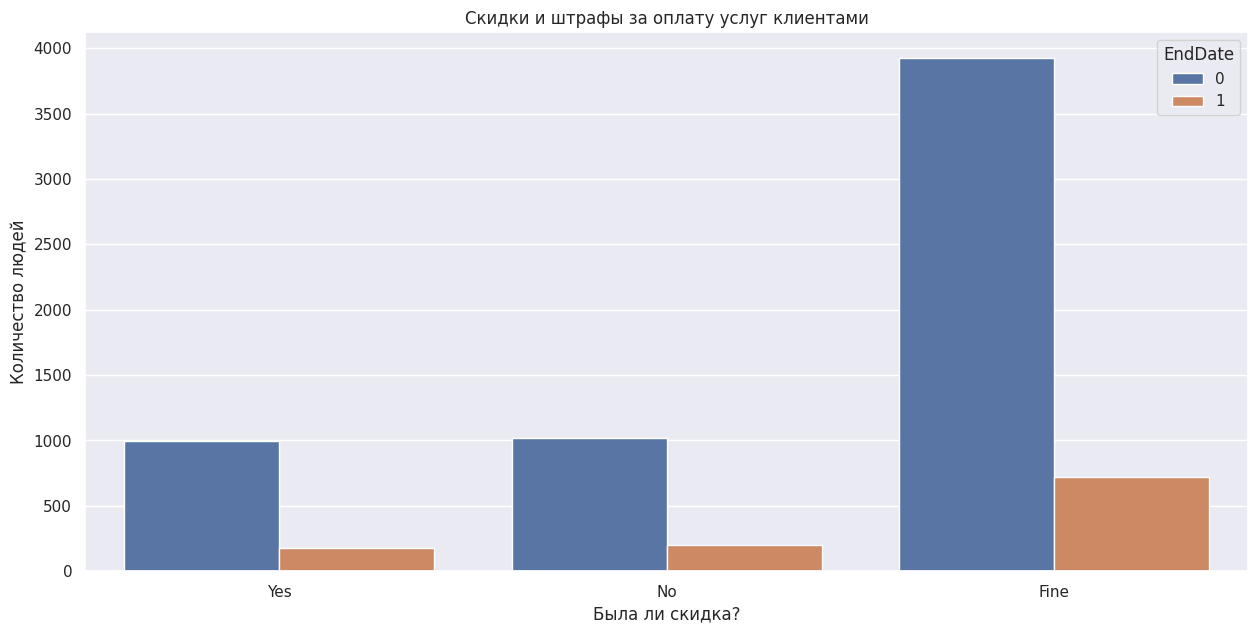

In [45]:
# изучаем влияние получения скидки/штрафа на возможность покинуть компанию
ax = sns.barplot(data=telecom.groupby(['discount', 'EndDate'], as_index=False).count().sort_values(by='customerID'), \
                 x='discount', y='customerID', hue='EndDate')
ax.set(title='Скидки и штрафы за оплату услуг клиентами', xlabel='Была ли скидка?', ylabel='Количество людей');

А вот это интересно: несмотря на большое количество переплат/штрафов в общем люди не спешат быстрее уходить из компании. Вероятность ухода людей со штрафами даже чуть ниже, чем людей со скидками! А вот люди которые платят всё точно имеют немного больший шанс покинуть нашу компанию. Может быть это связано с тем, что эти клиенты не чувствуют себя обязанными компании ничем и поэтому готовы проще с ней распрощаться.

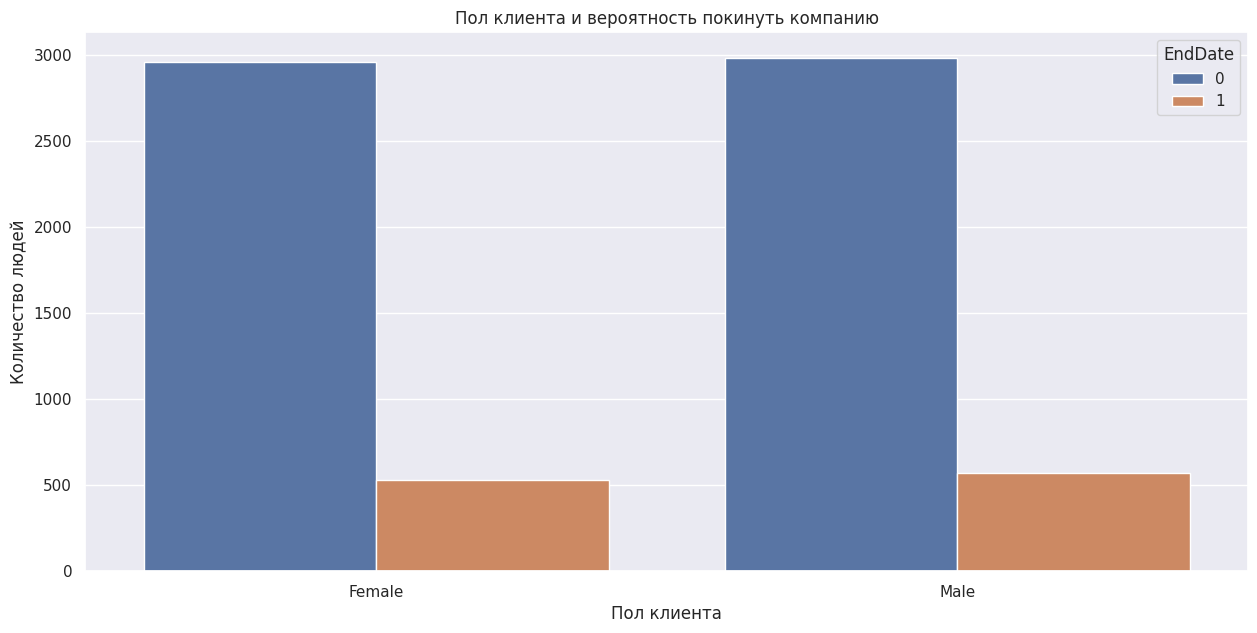

In [46]:
# изучаем влияние получения пола клиента на возможность покинуть компанию
ax = sns.barplot(data=telecom.groupby(['gender', 'EndDate'], as_index=False).count().sort_values(by='customerID'), \
                 x='gender', y='customerID', hue='EndDate')
ax.set(title='Пол клиента и вероятность покинуть компанию', xlabel='Пол клиента', ylabel='Количество людей');

Вывод: если и влияет пол клиента на возможность покинуть компанию, то явно не сильно. Но справедливости ради отметим, что мужчины покидают нашу компанию немного чаще женщин.

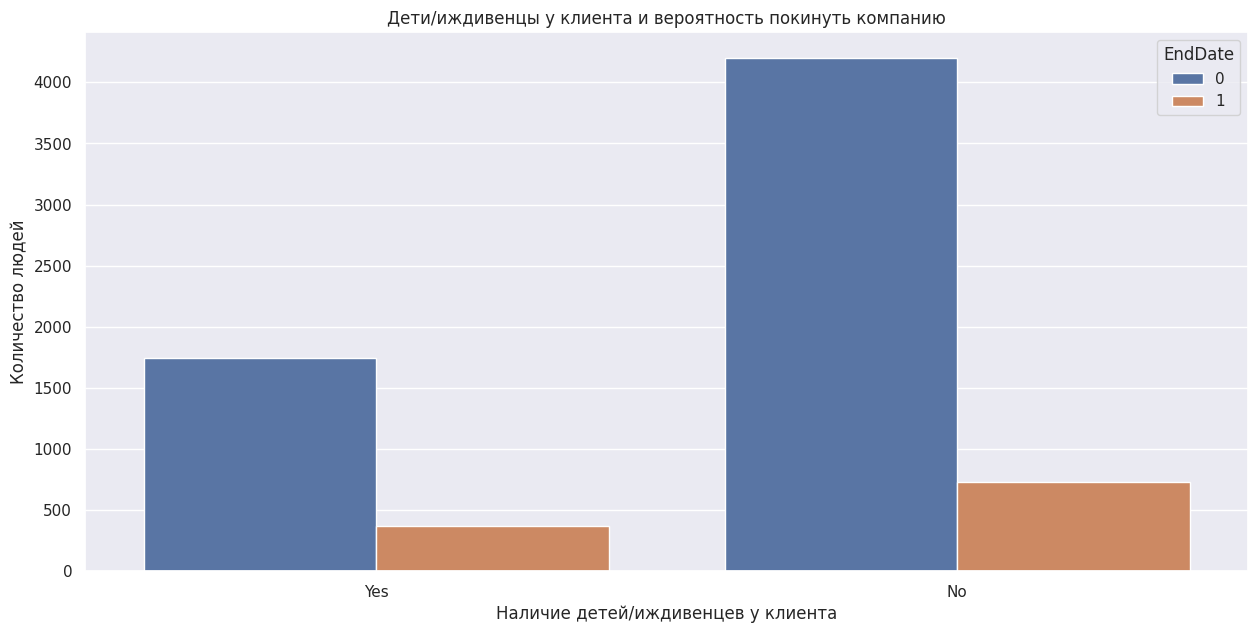

In [47]:
# изучаем влияние наличие детей/иждивенцев у клиента на возможность покинуть компанию
ax = sns.barplot(data=telecom.groupby(['Dependents', 'EndDate'], as_index=False).count().sort_values(by='customerID'), \
                 x='Dependents', y='customerID', hue='EndDate')
ax.set(title='Дети/иждивенцы у клиента и вероятность покинуть компанию', \
       xlabel='Наличие детей/иждивенцев у клиента', ylabel='Количество людей');

Надо отметить что наличие у клиента детей или же иных иждивенцев в семье немного, но повышает шанс на уход человека из компании - среди клиентов с детьми этот шанс примерно составляет 16%, а у человека без детей аналогичный шанс ухода составляет 14,5%.

Подведём итоги анализа: Итак наибольшее влияние на вероятность ухода оказывает год заключения контракта! И это влияние очень сильно! Фактически, чем раньше был заключён контракт, тем меньше людей там вообще было и большее количество людей в дальнейшем покинуло компанию. Далее заметно влияние того, что подключил клиент (интернет, DSL или интернет по оптоволоконному кабелю и телефон или просто телефон или же интернет, DSL и телефон). При этом подключение и интернета и телефона увеличивает шансы на то, что клиент покинет компанию, особенно это сильно заметно при подключении интернета по оптоволоконному кабелю вместе с телефоном. Обратим внимание что у нас нет вообще ни одного клиента который подключил бы просто интернет по оптоволоконному кабелю. Это странно, но может быть связано с ценой такого подключения. Далее сильно влияет общее количество дополнительных услуг, которые подключил клиент. При этом чем больше услуг подключил клиент, тем более вероятно, что он будет искать альтернативу нашей компании и тем скорее он её покинет. Далее довольно сильно влияет срок использования наших услуг в месяцах. При этом срок использования от 16 до 44 месев использования наших услуг - наиболее вероятное время ухода клиента. Особенно это важно для клиентов, которые используют наши услуги от 36 до 44 месяцев - среди таких доля ушедших аж 33%! Это много. Как ни странно, но те люди,которые плятят вовремя без скидок или же штрафов/переплат скорее покинут нашу компанию, чем те кто имеет скидки или же штрафы/переплаты. Также немного увеличивает шанс ухода нашего клиента если у него или у неё есть дети или же иждивенцы в семье. А вот пол самого человека почти не влияет на возможность ухода, хотя мужчины всё же покидали нашу компанию немного чаще.

## Подготовка данных для обучения моделей

В этой главе мы будет разбивать данные на тестовую и обучающую выборки, а также проводить масштабирование и кодирование наших данных.

In [48]:
# разделяем наши данные на обучающую и тестовую выборки
RANDOM_STATE=111223
telecom = telecom.drop(['customerID', 'BeginDate'], axis=1)
# проверка на явные дубликаты финального датафрейма до её разделения
print(telecom.duplicated().sum())

4


Обнаружены несколько дубликатов. Их нужно удалять, а только потом делить выборку.

In [49]:
# удаляем эти дубликаты
telecom.drop_duplicates(inplace=True)
# проверяем то их больше нет и выводим новый размер датафрейма
print(telecom.duplicated().sum())
print(telecom.shape)
# переводим столбецы add_options и begin_year в стороку - это дискретные признаки - можно сказать категории
telecom['add_options'] = telecom.add_options.astype('object')

0
(7039, 26)


In [50]:
# делим выборку
train, test = train_test_split(telecom, test_size=0.25, random_state=RANDOM_STATE, stratify=telecom.EndDate)

In [51]:
# выделяем названия столбцов для дальнейшего преобразования
obj_columns = train.drop('EndDate', axis=1).select_dtypes(include=['object']).columns
num_columns = train.drop('EndDate', axis=1).select_dtypes(exclude=['object']).columns
print(list(num_columns), list(obj_columns), sep='\n')

['MonthlyCharges', 'TotalCharges', 'duration', 'duration_days', 'begin_year']
['Type', 'PaperlessBilling', 'PaymentMethod', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'internet', 'phone', 'service', 'add_options', 'discount']


In [52]:
# меняем тип данных на категориальный
train[obj_columns] = train[obj_columns].astype('category')
test[obj_columns] = test[obj_columns].astype('category')
print(train.info(), test.info(), sep='\n')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5279 entries, 6413 to 1812
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   EndDate           5279 non-null   int64   
 1   Type              5279 non-null   category
 2   PaperlessBilling  5279 non-null   category
 3   PaymentMethod     5279 non-null   category
 4   MonthlyCharges    5279 non-null   float64 
 5   TotalCharges      5279 non-null   float32 
 6   gender            5279 non-null   category
 7   SeniorCitizen     5279 non-null   category
 8   Partner           5279 non-null   category
 9   Dependents        5279 non-null   category
 10  InternetService   5279 non-null   category
 11  OnlineSecurity    5279 non-null   category
 12  OnlineBackup      5279 non-null   category
 13  DeviceProtection  5279 non-null   category
 14  TechSupport       5279 non-null   category
 15  StreamingTV       5279 non-null   category
 16  StreamingMovies   527

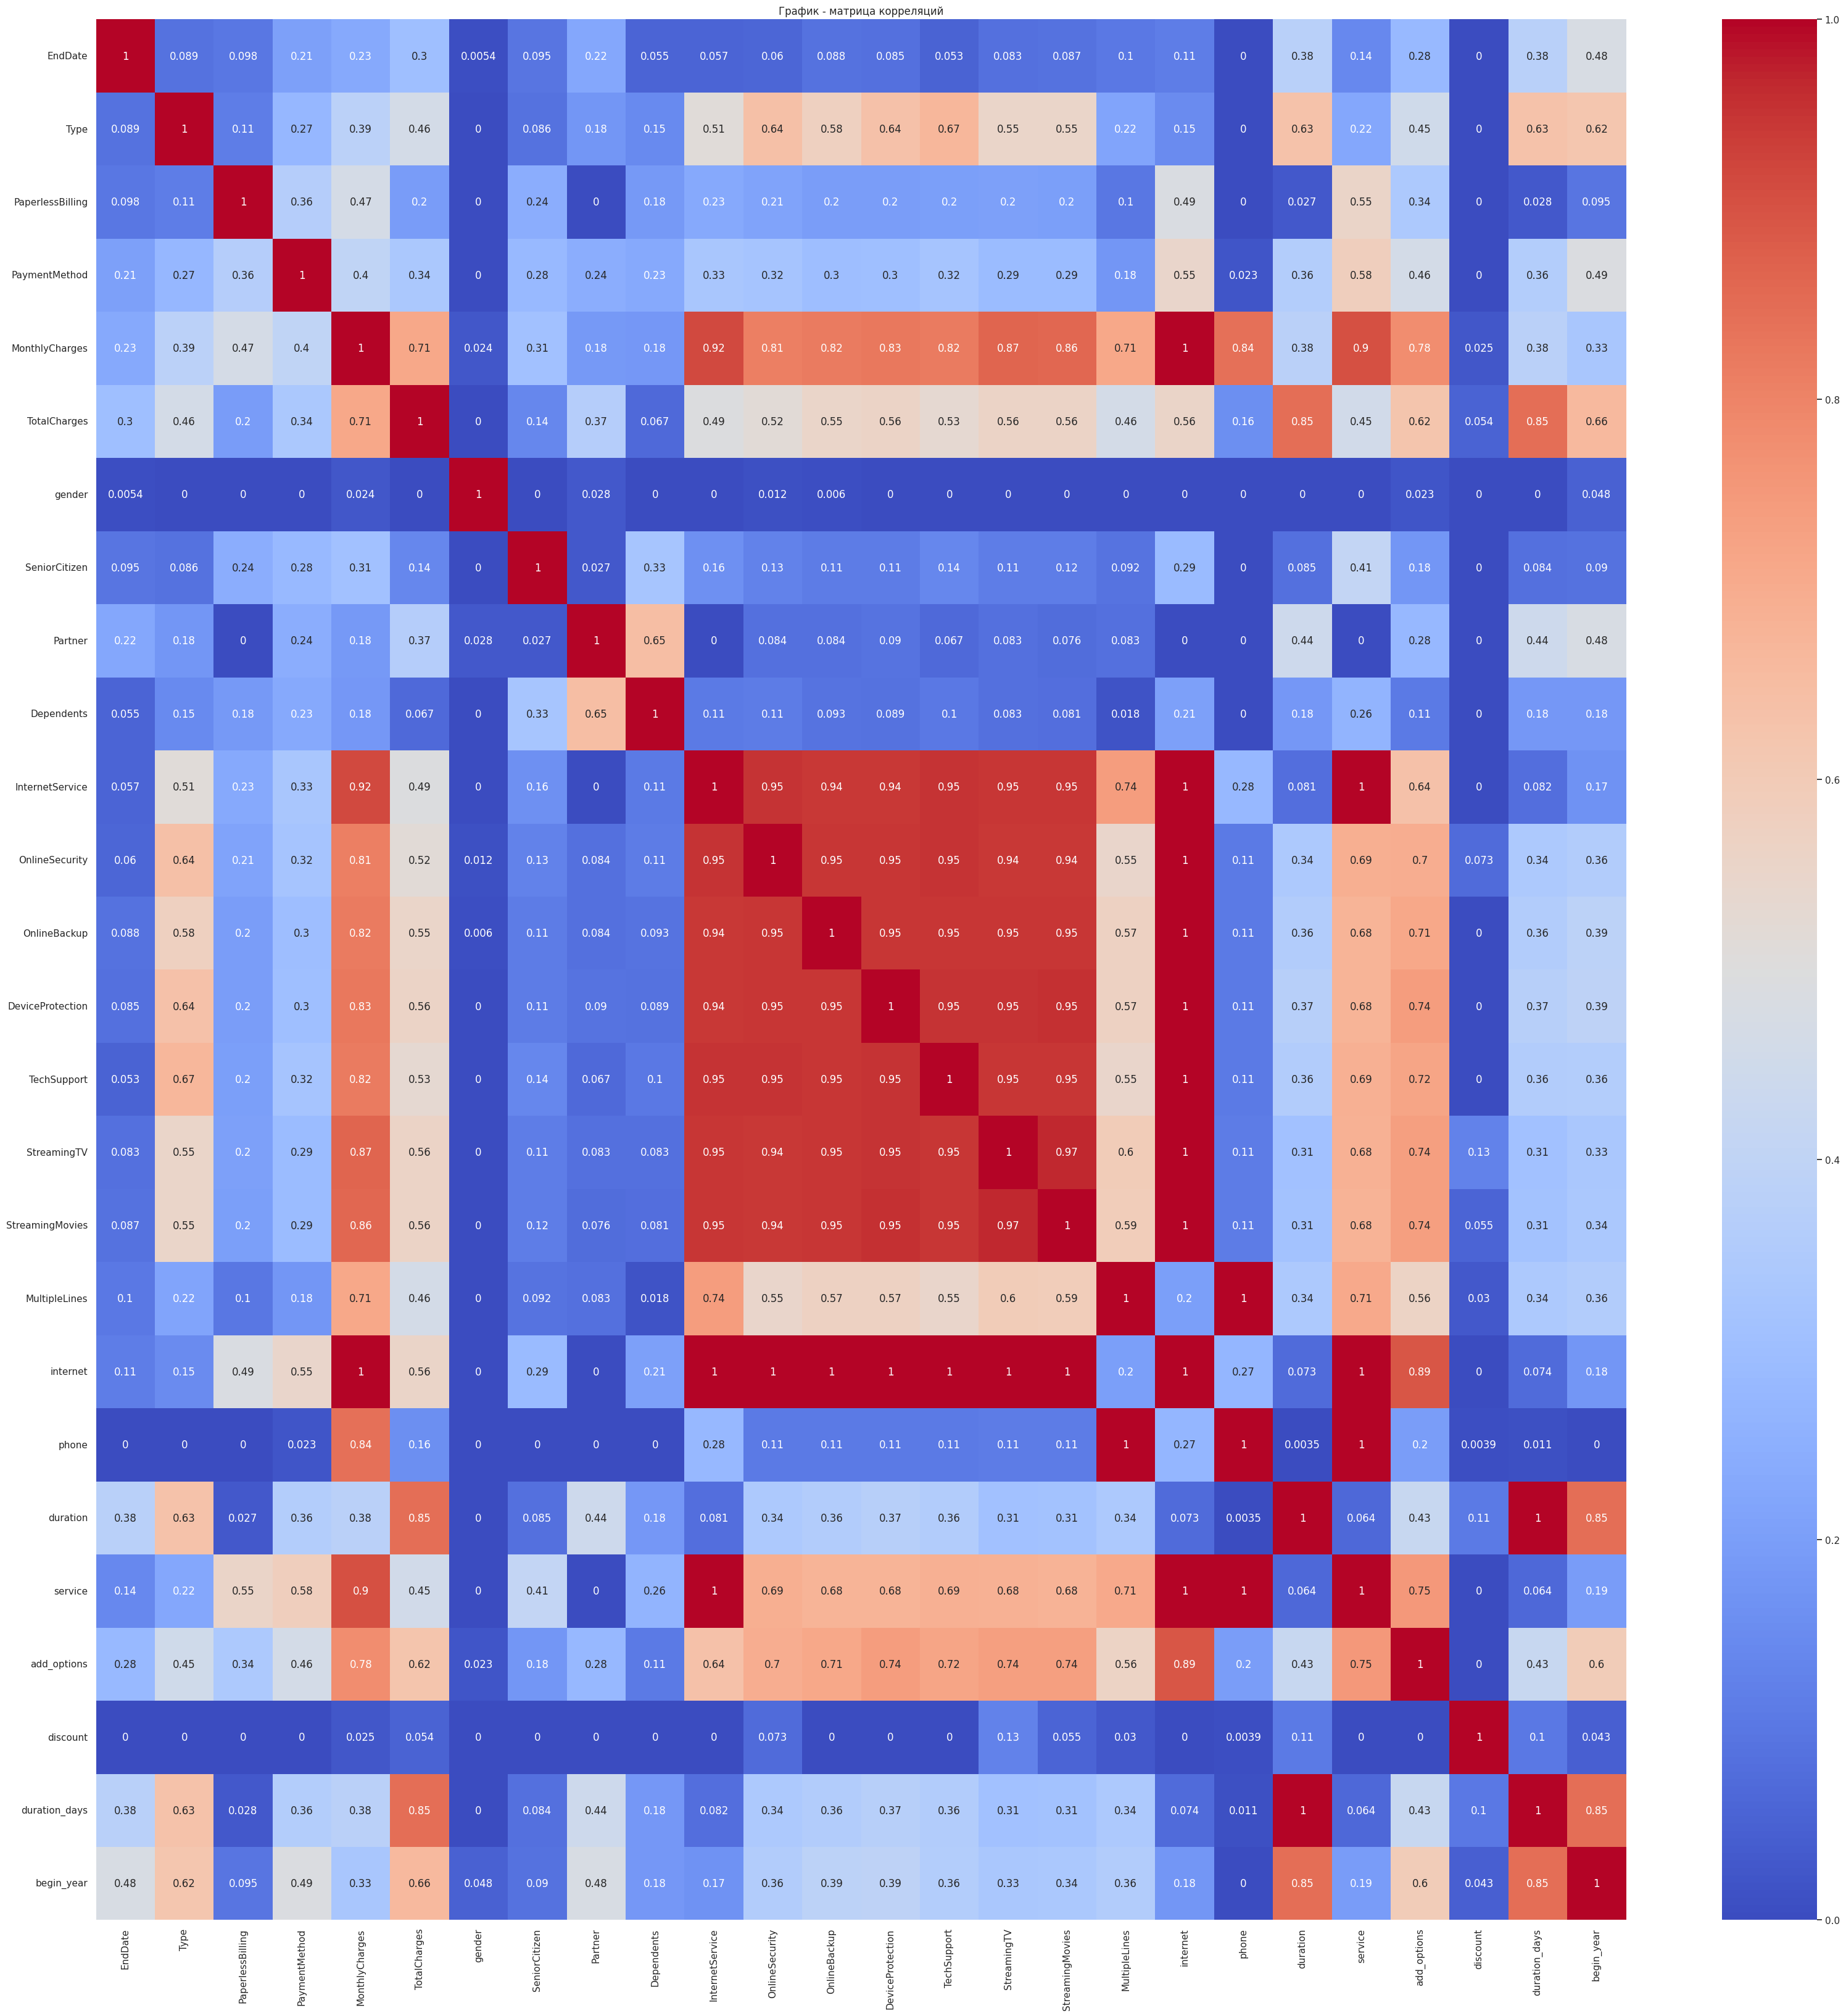

In [53]:
sns.set(rc={'figure.figsize': (40, 40)})
# корреляция между столбцами (с использованием библитеки phik)
ax = sns.heatmap(train.phik_matrix(interval_cols=['MonthlyCharges', 'TotalCharges', 'duration', 'duration_days']), cmap='coolwarm', annot=True)
ax.set(title='График - матрица корреляций');

У нас много взимно коррелирующих признаков:
1. internet - целых 9 (!) единичных корреляций - абсолютно бесполезный признак.
2. phone - 2 единичных корреляции (MultipleLines и service) - удалить.
3. service - единичные корреляции с internet, phone, InternetService и корреляция 0.9 с MonthlyCharges - удалить.
4. Все 7 опций интернета (InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies). Все эти признаки перевязаны на сами себе и ещё очень сильно связаны с MonthlyCharges. Поэтому удалить все 7 правильное решение.
5. Столбец discount никак не связан с нашей целью - тоже бесполезный признак.
6. Столбец duration имеет сильную взаимосвязь с TotalCharges и years_in_company по 0.85 - его можно удалить.
7. Стобец begin_year - Удаляем. Так как он имеет отношение к временным рядам. А мы не решаем задачу из них. Надо думать, наша модель иначе будет смотреть на год заключения сейчас - А что будет далее? Сейчас можно получить просто отличные метрики, но в перспективе... Не хорошо.
8. duration и duration_days - это одно и тоже только при разной конкретике по длительности (по месяцам или по дням). Оставляем по дням. По месяцам надо удалить.
9. Столбец gender почти бесполезен для результата - удаляем.

In [54]:
# удаляем все ненужные признаки из датафреймов train и test
train = train.drop(['service','internet', 'phone', 'discount','InternetService','OnlineSecurity', 'begin_year', 'gender',\
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', \
                    'StreamingMovies', 'duration', 'TotalCharges'], axis=1)
test = test.drop(['service', 'internet', 'phone', 'discount','InternetService', 'OnlineSecurity', 'begin_year', 'gender',\
                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', \
                  'StreamingMovies', 'duration', 'TotalCharges'], axis=1)
obj_columns = list(obj_columns)
for col in ['service', 'internet', 'phone', 'discount', 'InternetService', 'OnlineSecurity', 'gender', \
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    obj_columns.remove(col)
num_columns = list(num_columns)
for col in ['TotalCharges', 'begin_year', 'duration']:
    num_columns.remove(col)
# сбрасываем индексы
train.reset_index(drop=True, inplace=True)
train.reset_index(drop=True, inplace=True)
# проверяем размер датафреймов - должно быть 3:1
print(train.shape, test.shape, sep='\n')
print(obj_columns)
print(num_columns)

(5279, 11)
(1760, 11)
['Type', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'add_options']
['MonthlyCharges', 'duration_days']


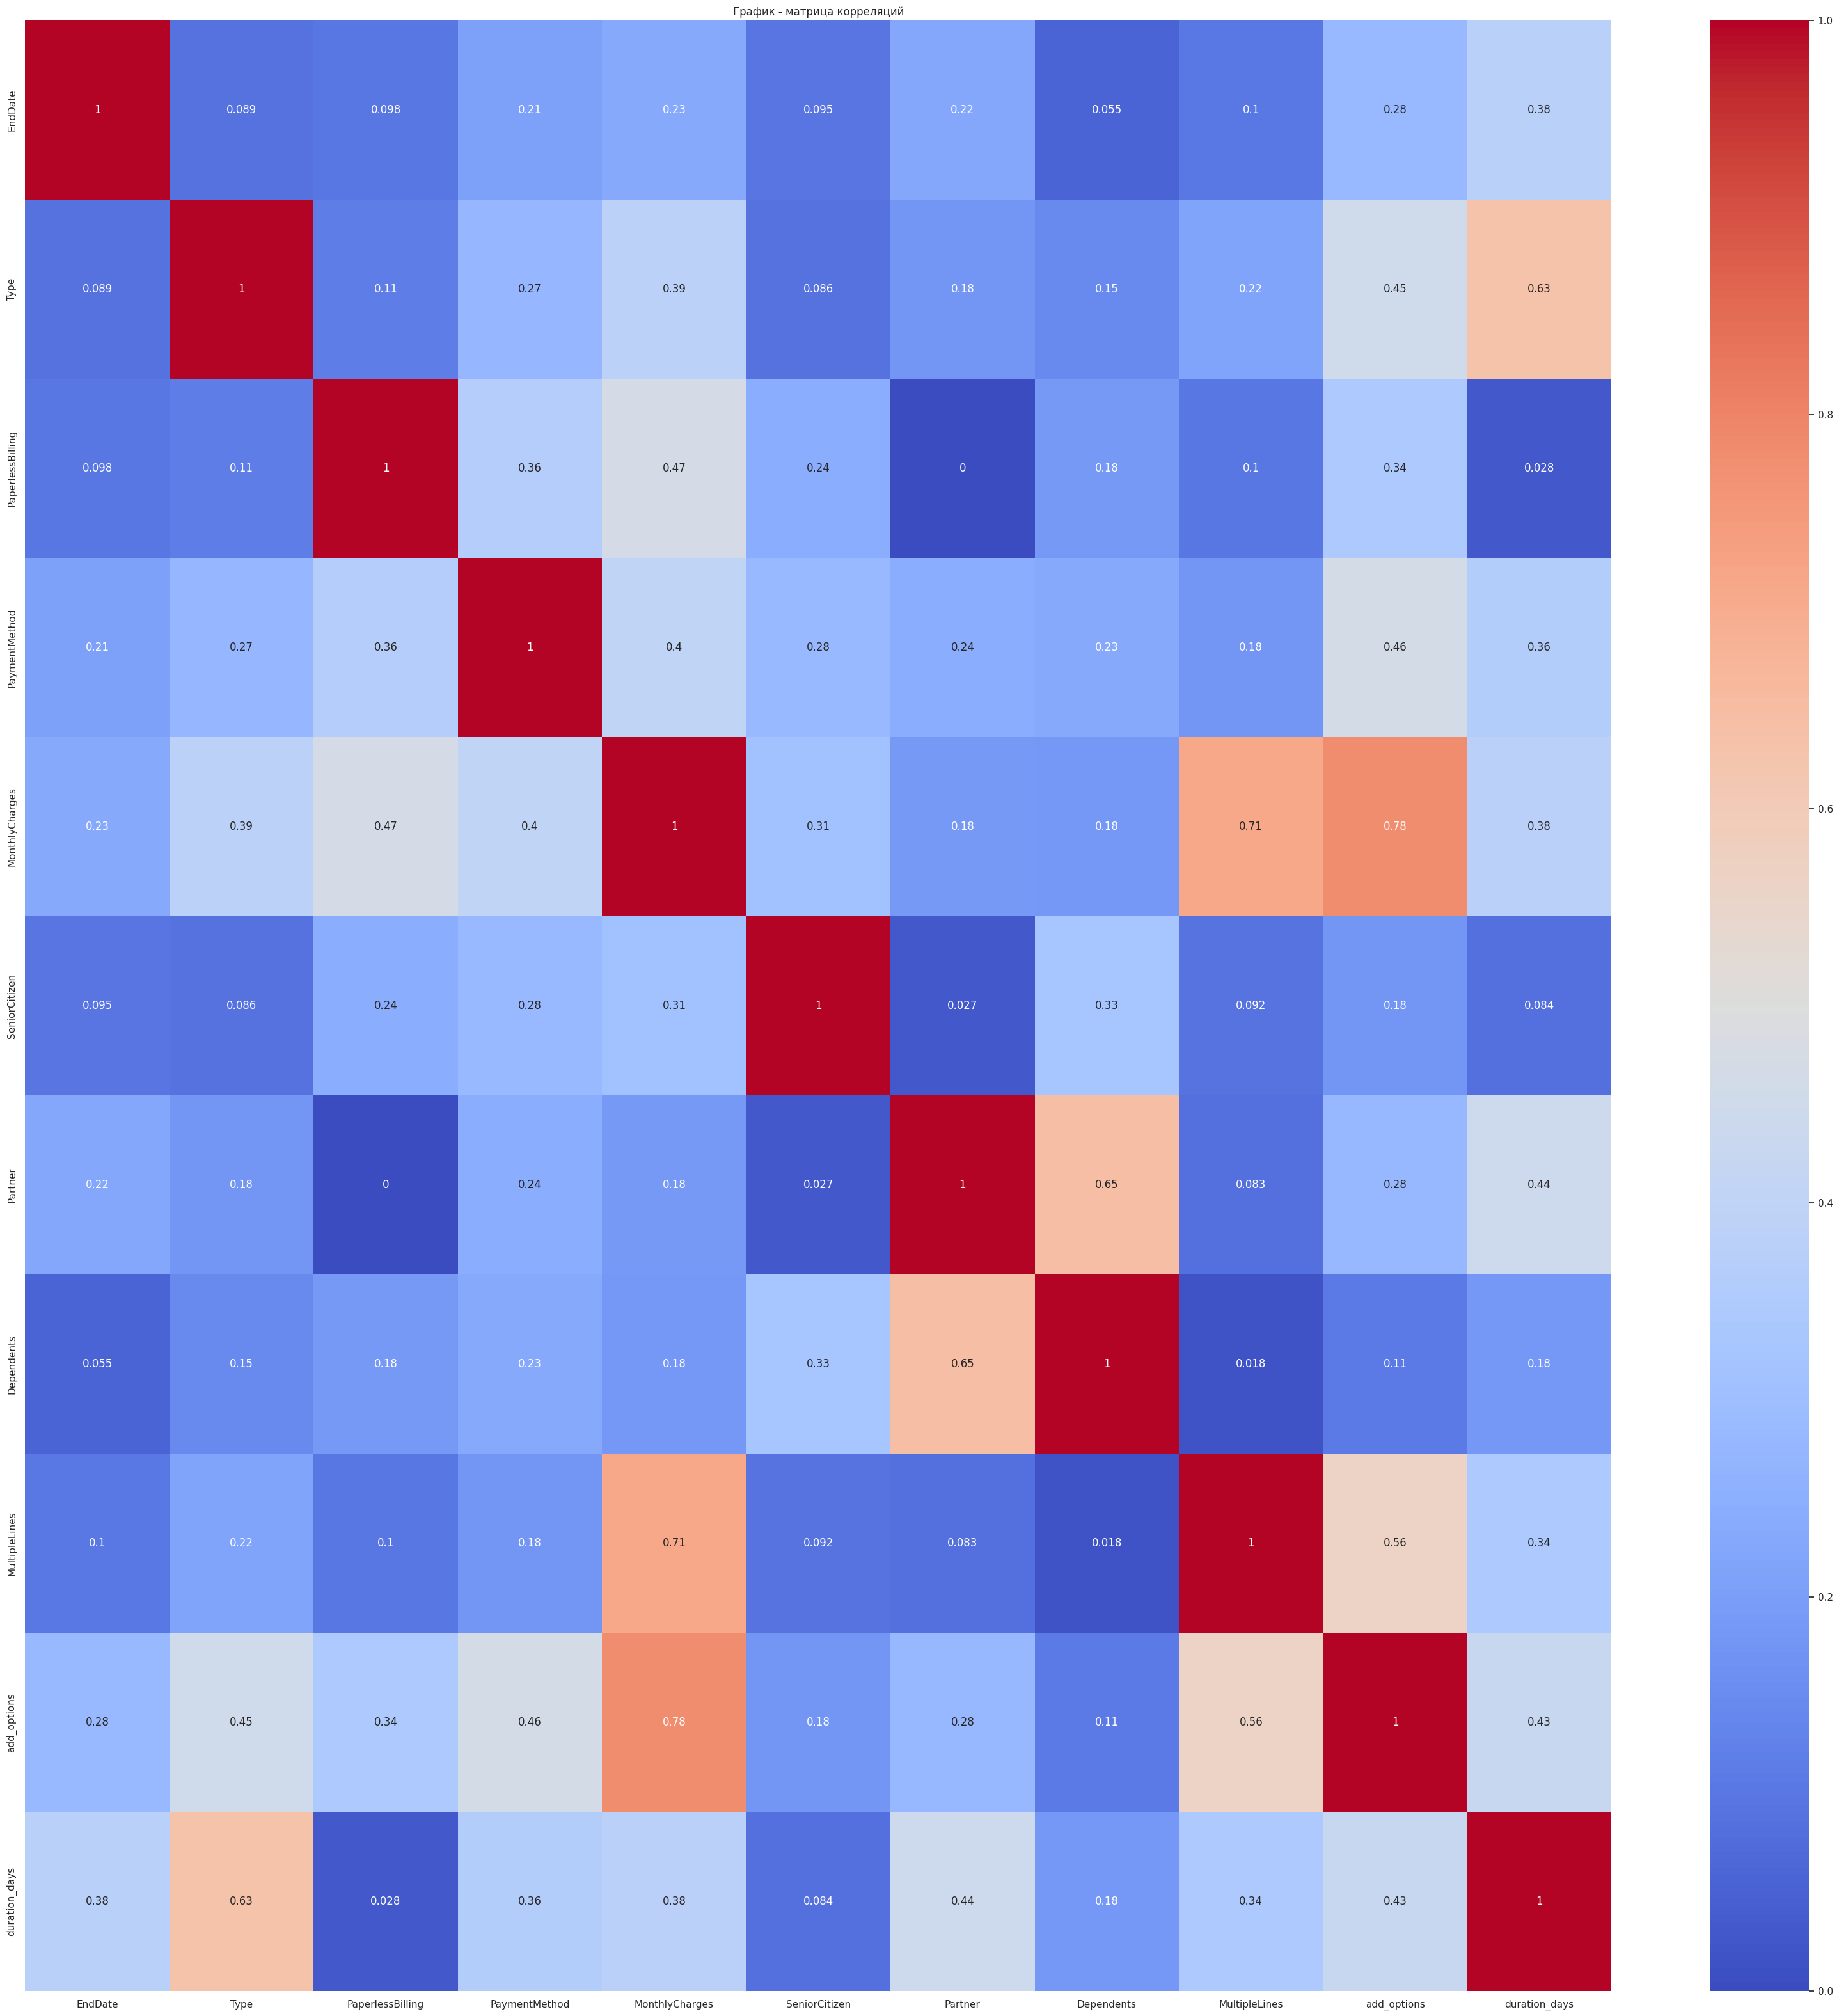

In [55]:
#  снова строим график - матрицу корреляций между столбцами (с использованием библитеки phik)
ax = sns.heatmap(train.phik_matrix(interval_cols=['MonthlyCharges', 'duration_days']), cmap='coolwarm', annot=True)
ax.set(title='График - матрица корреляций');

Вот теперь наш датафрейм очищен от бесполезных и слишком сильно коррелирующих между собой столбцов. Отделим целевой признак от признаков на обучающем и тестовом датафрейме и вперёд - к построению моделей!

In [56]:
# отделим целолевой столбец от данных
X_train = train.drop('EndDate', axis=1)
y_train = train.EndDate
X_test = test.drop('EndDate', axis=1)
y_test = test.EndDate

## Обучение моделей

### Логистическая регрессия с пайплайном

In [57]:
# составляем pipeline (на логистическую регрессию)
column_transform = make_column_transformer(
    (OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False), obj_columns),
    (StandardScaler(), num_columns)
)
pipeline_logistic = make_pipeline(column_transform, LogisticRegression(random_state=RANDOM_STATE, \
                                                              class_weight='balanced', solver='liblinear'))
pipe_params = {
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__C': [0.1, 1.0, 5.0, 10.0, 20.0],
    'logisticregression__max_iter': [100, 500, 1000, 1500]
}
log_grid = GridSearchCV(estimator=pipeline_logistic, param_grid=pipe_params, cv=3, scoring='roc_auc')

In [58]:
%%time
# обучаем логистическую регрессию с кросс-валидацией
log_grid.fit(X_train, y_train)
best_log_model = log_grid.best_estimator_
best_log_params = log_grid.best_params_
best_log_score = log_grid.best_score_
print('ROC-AUC логистической регрессии при кросс-валидации:', best_log_score)
print('Лучшие параметры логистической регрессии:', best_log_params)

ROC-AUC логистической регрессии при кросс-валидации: 0.7492886950251406
Лучшие параметры логистической регрессии: {'logisticregression__C': 1.0, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l1'}
CPU times: user 11.2 s, sys: 7.29 s, total: 18.5 s
Wall time: 11.7 s


Качество модели Логистической регрессии слабое. ROC-AUC логистической регрессии 0.7493 явно ниже искомых 0.85. Продолжаем поиск.

### "Решающее дерево" с пайплайном

In [59]:
# составляем pipeline (на "решающее" дерево)
column_transform_tree = make_column_transformer(
    (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=10), obj_columns),
    (StandardScaler(), num_columns)
)
pipeline_tree = make_pipeline(column_transform_tree, DecisionTreeClassifier(random_state=RANDOM_STATE, \
                                                              criterion='entropy'))
pipe_params_tree = {
    'decisiontreeclassifier__max_depth': range(2, 15),
    'decisiontreeclassifier__min_samples_split': range(2, 20, 2),
    'decisiontreeclassifier__min_impurity_decrease': [0.0, 0.02, 0.04]
}
tree_grid = GridSearchCV(estimator=pipeline_tree, param_grid=pipe_params_tree, cv=3, scoring='roc_auc')

In [60]:
%%time
# обучаем решающее дерево с кросс-валидацией
tree_grid.fit(X_train, y_train)
best_tree_model = tree_grid.best_estimator_
best_tree_params = tree_grid.best_params_
best_tree_score = tree_grid.best_score_
print('ROC-AUC решающего дерева при кросс-валидации:', best_tree_score)
print('Лучшие параметры решающего дерева:', best_tree_params)

ROC-AUC решающего дерева при кросс-валидации: 0.7810094314213686
Лучшие параметры решающего дерева: {'decisiontreeclassifier__max_depth': 7, 'decisiontreeclassifier__min_impurity_decrease': 0.0, 'decisiontreeclassifier__min_samples_split': 16}
CPU times: user 43.8 s, sys: 128 ms, total: 43.9 s
Wall time: 44.3 s


Качество решающего дерева лучше, чем у логистической регрессии, но и это тоже очень и очень мало. ROC-AUC решающего дерева - 0.7810. И тоже значительно ниже искомой метрики в 0.85. Не годится. Продолжаем поиск.

### "Случайный лес" с пайплайном

In [61]:
# составляем pipeline (на "случайный" лес)
pipeline_forest = make_pipeline(column_transform_tree, RandomForestClassifier(random_state=RANDOM_STATE, \
                                                              class_weight='balanced', criterion='log_loss'))
pipe_params_forest = {
    'randomforestclassifier__max_depth': range(2, 15),
    'randomforestclassifier__n_estimators': range(70, 191, 30),
    'randomforestclassifier__min_impurity_decrease': [0.0, 0.02, 0.04]
}
forest_grid = GridSearchCV(estimator=pipeline_forest, param_grid=pipe_params_forest, cv=3, scoring='roc_auc')

In [62]:
%%time
# обучаем случайный лес с кросс-валидацией
forest_grid.fit(X_train, y_train)
best_forest_model = forest_grid.best_estimator_
best_forest_params = forest_grid.best_params_
best_forest_score = forest_grid.best_score_
print('ROC-AUC случайного леса при кросс-валидации:', best_forest_score)
print('Лучшие параметры случайного леса:', best_forest_params)

ROC-AUC случайного леса при кросс-валидации: 0.8271241022283916
Лучшие параметры случайного леса: {'randomforestclassifier__max_depth': 7, 'randomforestclassifier__min_impurity_decrease': 0.0, 'randomforestclassifier__n_estimators': 190}
CPU times: user 4min 27s, sys: 852 ms, total: 4min 27s
Wall time: 4min 32s


Качество модели случайного леса ожидаемо выше, чем у модели решающего дерева, но это всё ещё не достаёт до заданного порога. ROC-AUC случайного леса составил 0.8271 при необходимых как минимум 0.85. Тоже мимо. Продолжаем поиск.

### Градиентный бустинг

In [63]:
# составляем pipeline (на градиентный бустинг)
gradboost = Pipeline([('col_transform', column_transform_tree),\
                      ('LGBMClassifier', lgb.LGBMClassifier(random_state=RANDOM_STATE, \
                                                            class_weight='balanced', verbosity=0))])
params_gradboost = {
    'LGBMClassifier__n_estimators': [100, 200, 300, 400],
    'LGBMClassifier__num_leaves': [3, 7, 15, 31],
    'LGBMClassifier__learning_rate': [0.05, 0.1, 0.15],
    'LGBMClassifier__num_iterations': range(100, 301, 50)
}
gradboost_grid = GridSearchCV(estimator=gradboost, param_grid=params_gradboost, cv=3, scoring='roc_auc')

In [64]:
%%time
# обучаем градиентный бустинг с кросс-валидацией
gradboost_grid.fit(X_train, y_train)
best_gradboost_model = gradboost_grid.best_estimator_
best_gradboost_params = gradboost_grid.best_params_
best_gradboost_score = gradboost_grid.best_score_
print('ROC-AUC градиентного бустинга при кросс-валидации:', best_gradboost_score)
print('Лучшие параметры градиентного бустинга:', best_gradboost_params)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will 

ROC-AUC градиентного бустинга при кросс-валидации: 0.880701818583459
Лучшие параметры градиентного бустинга: {'LGBMClassifier__learning_rate': 0.15, 'LGBMClassifier__n_estimators': 100, 'LGBMClassifier__num_iterations': 300, 'LGBMClassifier__num_leaves': 7}
CPU times: user 2min 5s, sys: 2.61 s, total: 2min 8s
Wall time: 2min 10s


/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


Градиентный бустинг от Lightgbm первым превысил заданный порог. ROC-AUC составил 0.8807 при необходмых 0.85. Что покажет его аналог от CatBoost?

In [65]:
# составляем pipeline (на градиентный бустинг catboost)
catboost = Pipeline([('col_transform', column_transform_tree),\
                      ('catboost', CatBoostClassifier(loss_function='Logloss', random_state=RANDOM_STATE, \
                                                           class_weights={0: 1, 1: 6}, verbose=0))])

params_catboost = {
    'catboost__max_depth': [2, 4, 6, 8],
    'catboost__learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25],
    'catboost__num_boost_round': range(200, 401, 50)
}
catboost_grid = GridSearchCV(estimator=catboost, param_grid=params_catboost, cv=3, scoring='roc_auc')

In [66]:
%%time
# обучаем градиентный бустинг (catboost) с кросс-валидацией
catboost_grid.fit(X_train, y_train)
best_catboost_model = catboost_grid.best_estimator_
best_catboost_params = catboost_grid.best_params_
best_catboost_score = catboost_grid.best_score_
print('ROC-AUC градиентного бустинга (catboost) при кросс-валидации:', best_catboost_score)
print('Лучшие параметры градиентного бустинга (catboost):', best_catboost_params)

ROC-AUC градиентного бустинга (catboost) при кросс-валидации: 0.909116993281143
Лучшие параметры градиентного бустинга (catboost): {'catboost__learning_rate': 0.25, 'catboost__max_depth': 2, 'catboost__num_boost_round': 400}
CPU times: user 5min 33s, sys: 44.8 s, total: 6min 18s
Wall time: 4min 3s


Модели градиентного бустинга и в лице LGBMClassifier и в лице CatBoostClassifier не подвели! Оба показали результат больше искомых 0.85. ROC-AUC соотвественно составили 0.8807 и 0.9091.

Но надо заметить, что модель CatBoostClassifier показала себя лучше. Именно её мы и отправим на тестирование.

## Тестирование лучшей модели

In [67]:
# проверка результатов на тесте
prob_test = catboost_grid.predict_proba(X_test)[:, 1]
pred_test = catboost_grid.predict(X_test)
print("ROC-AUC лучшей модели на тесте:", roc_auc_score(y_test, prob_test))
print("Точность лучшей модели на тесте:", accuracy_score(y_test, pred_test))
print("То есть наша модель смогла правильно идентифицировать", f'{accuracy_score(y_test, pred_test):.2%} всех наших клиентов')

ROC-AUC лучшей модели на тесте: 0.9315469850015305
Точность лучшей модели на тесте: 0.8738636363636364
То есть наша модель смогла правильно идентифицировать 87.39% всех наших клиентов


То есть мы смогли создать просто великолепную модель которая правильно разделяет наших клиентнов, при этом почти не допуская много промахов (87.4% правильно идентифицированных клиентов). Осталось сравнить результаты с базовой (константной) моделью и построить матрицу корреляций и рассчитать полноту и точность нашей модели.

In [68]:
# сравнение с dummy - моделью
dummy = Pipeline([('col_transform', column_transform_tree),\
                      ('dummy', DummyClassifier(random_state=RANDOM_STATE))])
params_dummy = {
    'dummy__strategy': ['most_frequent', 'prior', 'stratified', 'uniform']
}
dummy_grid = GridSearchCV(estimator=dummy, param_grid=params_dummy, cv=3, scoring='roc_auc')
dummy_grid.fit(X_train, y_train)
prob_dummy = dummy_grid.predict_proba(X_test)[:, 1]
pred_dummy = dummy_grid.predict(X_test)
print("ROC-AUC dummy модели на тесте:", roc_auc_score(y_test, prob_dummy))
print("Точность dummy модели на тесте:", accuracy_score(y_test, pred_dummy))

ROC-AUC dummy модели на тесте: 0.5
Точность dummy модели на тесте: 0.84375


Наша лучшая модель значительно лучше константной, в чём мы и убедились.

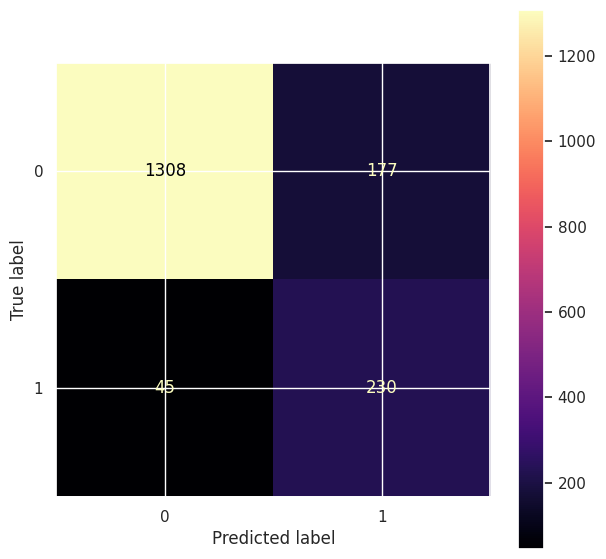

In [69]:
sns.set(rc={'figure.figsize': (7, 7)})
# строим матрицу ошибок
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, pred_test))
disp.plot(cmap='magma')
plt.show()

У нас 1308 клиентов, которых мы правильно идентифицировали как не уходящих от нас. Правильно идентифицировали 230 клиентов, которые нас покинут. В случае 177 клиентов мы ошиблись - показали ложно положительный результат (ошибка 1го рода - Они не ушли, но мы показали их как ушедших) и 45 человек, которых мы неверно идентифицировали не как ушедших от нас, хотя они на самом деле ушли. Таким обрахом наша полнота ушедших от нас людей, которые мы смогли верно идентифицировать - 83,6%. При этом у нас средняя по качеству метрика по precision (точности) 56,5%. То есть наша модель ошибается немного реже, чем в каждом втором случае и захватывает хорошую долю тех клиентов, которые хотят уйти.

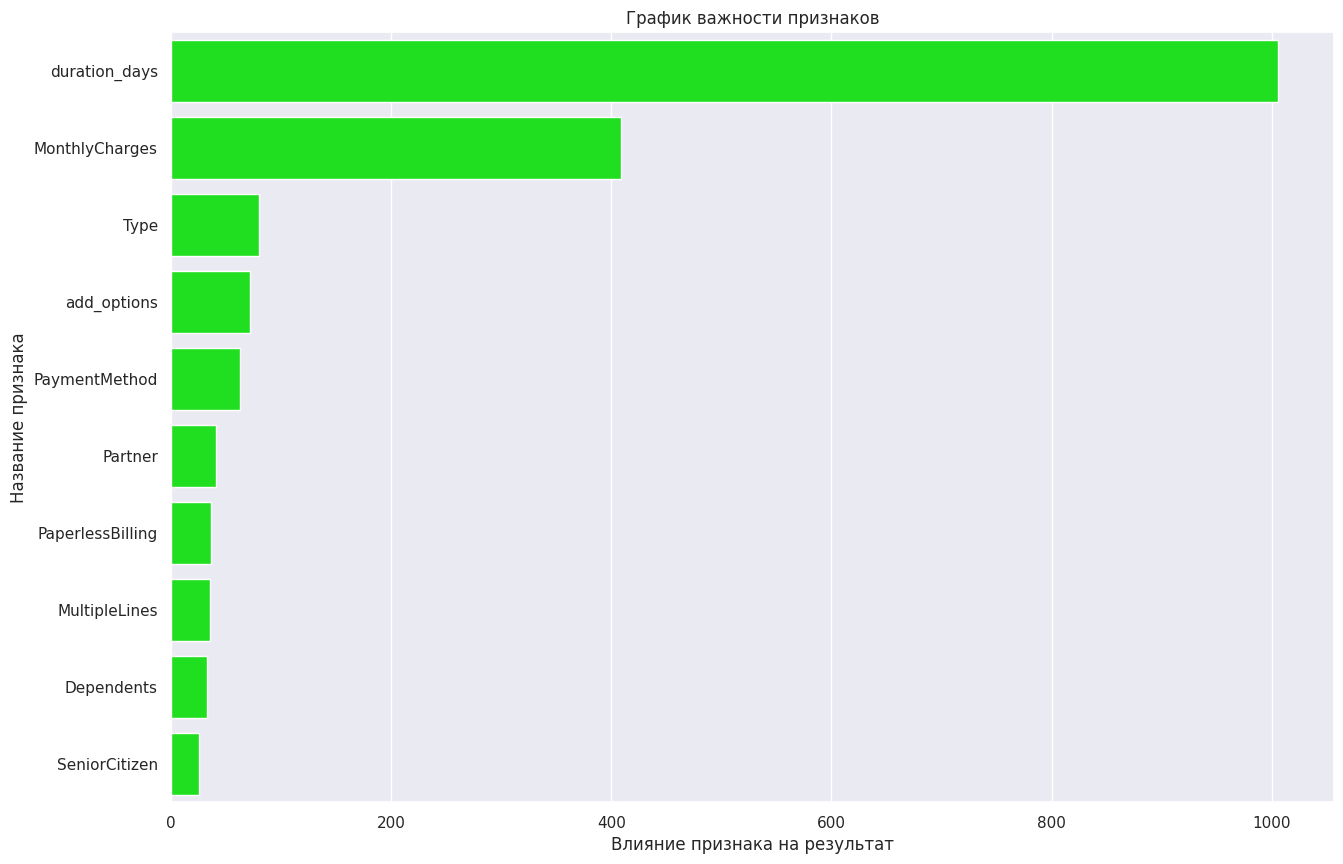

In [70]:
sns.set(rc={'figure.figsize': (15, 10)})
# какие параметры повлияли на результат сильнее всего?
feature = ['Type', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen', 'Partner', \
           'Dependents', 'MultipleLines', 'add_options', 'MonthlyCharges', 'duration_days']
feature_impotance = pd.Series(best_gradboost_model[1].feature_importances_, index=feature)
feature_impotance = feature_impotance.sort_values(ascending=False)
ax = sns.barplot(x=feature_impotance.values, y=feature_impotance.index, color='lime')
ax.set(title='График важности признаков', xlabel='Влияние признака на результат', ylabel='Название признака');

Самые важные признаки для модели оказались следующие: duration_days (количество дней, сколько клиент в компании), MonthlyCharges (месячные расходы клиента) - это самые важные параметры, Type (Тип оплаты), add_options (количество дополнительных опций, подключенным клиентом) и PaymentMethod (метод платежа). Самые же бесполезные - SeniorCitizen (пожилой ли наш клиент), Dependents (дети/люди на иждивении у клиента),  MultipleLines (Подключение телефона к нескольким линиям одновременно). Похоже, с них модель много не узнала.

## Отчёт заказчику

Перед нами поставили проблему - заказчик (оператор связи "ТелеДом") хочет бороться с проблемой оттока клиентов с помощью рассылки промокодов и специальных условий тем, кто планирует отказаться от услуг связи. Нам сказали построить модель, которая хобудет предсказывать расторгнет ли клиент компании договор с ней и не уйдёт ли к другому оператору связи. Наша цель: была построить модель с метрикой roc-auc не менее 0.85 на базе данных нашего клиента (здесь: тестовая выборка). Оператор связи "ТелеДом" предоставляет услуги телефонии (с возможностью подключить многокальный телефон) и интернета либо по цифровой абоненской линии или по оптоволоконному кабелю. Также предоставляя несколько дополнительных услуг за отдельную плату: антивирус, блокировка опасных сайтов, выделенная линия технической поддержки, облачное хранилище файлов а также стриминговое телевидение и каталог фильмов. Нам сказали, что оплата клиентами может быть помесячной, за год или за 2 года.

Данные пришли от заказчика в 4 файлах: 1ый о абонентах, 2ой о об их личных особенностях, 3ий о тех, кто подключил услуги интернета и какие именно, 4ый о подключённых услугах телефонии и какие клиенты их подключили. Сначала мы загрузили данные и и осмотрели их. Уже на этом этапе мы выяснили, что у нас 4835 человек из 7043 клиентов пользуются и телефонией и интернетом, а вот подключённные дополнительные опции у них могут быть совершенно различными.

Затем мы провели первичный осмотр данных и выяснили следущее:
1. Информация о типе оплаты: самая популярная из них - оплата помесячная. Такую оплату используют около 3900 человек. На втором месте по популярности - оплата на 2 года вперёд - её используют около 1700 человек и последняя по популярности - оплата на год вперёд. Её используют немногим менее 1500 человек.
2. Что электронный платёжный документ есть примерно у 59% клиентов (примерно 4150 человек). И у остальных - это около 2900 человек - его нет. Как правда, это влияет на факт ухода от обслуживания - пока не ясно.
3. Вяснили тот факт, что по типу платежа самый популярный электронный платёж (примерно 2350 человек), далее следует почтовый платёж (примерно 1650 человек). А вот автоплатежи с банковской карты и кредитной карты не так популярны, хотя всё ещё очень значительны (немногим более 1500 человек пользуются каждым из этих 2 способов. Это также значит, что примерно 43% клиентов пользуются автоплатежами. Не так и мало.
4. Выяснили, что размер месячного платежа колеблется от 18.25 до 118.75 долларов. При этом мода этого распределения находиться в пределах 20 долларов. При этом среднее составляет 64.76 долларов, медиана больше - 70.35. Связано это с большим разбросом значений. Также обращает внимание не очень большое количество людей с месячным платежом от 30 до примерно 70 долларов. Мы сделали предположение, что это связано с тем, что большинство людей предпочитает брать интернет и/или телефонию без дополнительных услуг или уже с приличным количеством дополнительных опций.
5. Большинство клиентов принесли компании до 2000 долларов. Но заметен очень сильный разброс значений. И из-за него 20% с наибольшими платежами принесли компании почти в два раза больше, чем в среднем и это как минимум. Максимум в 4.5 раза больше, чем в среднем.
6. Доля мужчин и женщин среди компании примерно одинакова.
7. Пенсионеров среди клиентов компании около 15%.
8. Людей женатых/замужем среди клиентов компании примерно 48%, а доля имеющих детей или людей на иждивении около 30%.

Далее используя общие назвния столбца во всех наших файлах мы объединили их в одну большую таблицу. Возникшие пропуски мы заполнили простым техническим значением, означающим техническую невозможность, так как нельзя подключить дополнительные услуги услуги, связанные с интернетом без самого интернета, тоже самое касается и многокальной телефонии без самой телефонии.

Потом мы создали несколько столбцов для более конкретного анализа данных, 2 из которых ушли дальше в наши модели и ими стали - продолжительность пользования услугами компании в месяцах и сколько конкретно дополнительных услуг подключил наш клиент.
Вот что мы ещё узнали из наших данных объединив их:
1. Что за всё время мы потеряли примерно 1100 клиентов из 7043. Что составляет примерно 15.6% от общего числа пользователей. И вяснили, что у нас налицо явный дисбаланс классов и для правильного обучения моделей нужно будет ставить class_weigh='balanced' для улучшения качества удучшения обучения моделей.
2. Средний срок использования услуг компании у клиентов составляет 2.5 года. Медианное значение меньше - 2 года и 2 месяца. Надо сказать, что наблюдается довольно большой разброс в данных от совсем новых клиентов до "старожилов", которые пользуются нашими услугами более 6 лет. Притом заметим, что последних далеко не так мало.
3. А заодно узнали, что наибольшая вероятность ухода из компании возникает в период немногим более 30 месяцев (около 2.5 лет) пользования услугами компании. До этого времени вероятность немного растёт, а затем падает. Если же клиент использует услуги компании свыше 60 месяцев (5 лет), то шанс на то, что он перестанет пользоваться услугами компании становиться минимальной. Так же отметим, что вероятность перестать пользоваться услугами компании до 15 месяцев не очень велика. Особое внимание надо уделить клиентам компании, которые пользуются услугами от 15 месяцев (1 год 3 месяца) до 45 месяцев (3 года 9 месяцев). По относительным показателям наиболее "опасный" период - от 36 до 44 месяцев пользования услугами нашей компании. Здесь вероятность ухода клиента - примерно 1/3(! - 33%) при средней вероятности в 15.6%. Вероятно это связано с тем, что в это время во-первых не очень много клиентов как таковых, а во-вторых клиент, скорее всего, активно ищет альтернативы.
4. С некоторым удивлением отметили, что никто не подключил просто интернет по оптоволоконному кабелю без подключения телефона. Также отметили, что самый популярный вариант - интернет по оптоволоконному кабелю + телефонония. Таким вариантом пользуются примерно 44% пользователей. Второй вариант по популярности по цифровой абоненской линии и подключенный телефон. Этим способом пользуются немногим более 24% пользователей. Просто телефоном пользуются примерно 22% пользователей и оставшиеся около 10% пользователей пользуются интернетом по цифровой абоненской линии. При этом относительные шансы покинуть компанию: при интернете по цифровой оптической линии - примерно 1/7 (14,3%). При интернете по цифровой линии и подключенном телефоне возможность покинуть примерно 2/17 (11,8%). При интернете по оптической линии и подключенном телефоне возможность покинуть компанию возрастает до 6/31 (19,4%). И просто при подключенном телефоне эта возможность составляет примерно 9,6%. Т.е. можно сказать, что при подключении интернета по оптической линии и телефона значительно возрастает шанс ухода нашего клиента по сравнению с остальными вариантами.
5. По поводу дополнительных услуг мы выяснили следущее: что чем больше число дополнительных услуг подключено, тем меньшее число людей их подключило. И чаще всего люди не используют дополнительные услуги вообще. Таких людей среди клиентов компании примерно 23,6%. Ещё примерно 16,4% всех клиентов подключили 1 дополнительную услугу. Примерно по 13,5% клиентов используют от 2 до 4 дополнительных услуг. 5 дополнительных услуг клиенты используют примрено в 10,6% случаев, 6 - примерно в 5,9% случаев. Все 7 дополнительных услуг используют клиенты примерно в 2,9%. И количество подключенных дополнительных услуг оказалось напрямую связано с риском ухода из компании - заметно повышая его вместе с ростом подключённых услуг. Языком сухих цифр: примерно 6% клиентов уходят от компании без дополнительных услуг, с 1 дополнительной услугой таких клиентов 8,7%, с 2 - 11,8%, с 3 - 18,3%, с 4 - 22,3%, с 5 - 28,9%, с 6 - 25%, с 7 - примерно 22%. Таким образом можно сказать, что люди с 4 или большим количеством дополнительных услуг находяться в "зоне риска" и шанс выхода этих людей довольно велик.
6. Ситуация со штрафами довольно печальна - чаще всего люди зарабатывали на штраф и это было приблизительно в 65,3% случаев. В 17, 7% люди обходились без штрафов и только в 17% клиенты могут получить скидку от компании. При этом размер этой скидки ещё не ясен. Как собственно и штрафа. Но при этом переплатившие/заплатившие штраф люди расторгали договор с компанией не чаще других. Чаще всего (в относительном выражении) это делали платившие ровно без скидок.
7. Пол клиента почти не влияет на расторжение договора, а также отмелитли что наличие у клиента детей или же иных иждивенцев в семье немного, но повышает шанс на уход человека из компании - среди клиентов с детьми этот шанс примерно составляет 16%, а у человека без детей аналогичный шанс ухода составляет 14,5%.
8. И самое главное - обнаружилась очень сильная корреляция между годом заключения контракта и тем, останется ли клиент в компании или нет. Фактически, чем в более раннем году клиент заключит контракт с компанией, тем более вероятно, что он покинет компанию. Начиная с 2017 года заключения контракта клиент уже с намного большей вероятностью останется в компании. Но это сейчас - что будет дальше - пока совершенно не ясно и на этом признаке нельзя строить модели.

Далее построили пайплайны со всеми нашими моделями. Всего мы рассмотрели 5 моделей 4 различных типов.
1. Логистическую регрессию из линейных моделей. для неё кодировали данные по типу OneHotEncoder, а числовые данные стандартизировали.
2. Использовали модель "Решаюшего дерева". Для неё и далее мы применяли Порядковое кодирование, а числовые данные стандартизировали.
3. Использовали модель "Случайного леса".
4. Сделали 2 модели с градиентным бустингом (от lightgbm и catboost). Предобработка этих моделей совпадает с предобработкой случайного леса.

В итоге - только модели градиентного бустинга оказались хорошими - их точность по ROC-AUC на обучающей выборке (при кросс - валидации) оказалась 0.8807 - lightgbm и 0.9091 - от catboost. Мы на тестирование отдали модель градиентного бустинга от catboost. У неё оказались следующие гиперпараметры: {'catboost__learning_rate': 0.25, 'catboost__max_depth': 2, 'catboost__num_boost_round': 400}. Эта модель дала нам просто отличное качество - значительно выше заданного значения. ROC-AUC на тесте оказалась равна 0.9315. Accuracy оказалась  - 0.8739. Далее построили матрицу ошибок и посчитали точность и полноту всех ушедших клиентов. Полнота оказалась хорошей - 83,6% всех ушедших клиентов наша модель нашла. А вот точность всего лишь средней - 56,5%. То есть шанс на промах модели составил 43,5%. Это означает, что в немного реже, чем в каждом втором случае будет ложное срабатывание

По степени вжности признаков: Самые важные признаки для модели оказались следующие: duration_days (количество дней, сколько клиент в компании), MonthlyCharges (месячные расходы клиента) - это самые важные параметры, Type (Тип оплаты), add_options (количество дополнительных опций, подключенным клиентом) и PaymentMethod (метод платежа). Самые же бесполезные - SeniorCitizen (пожилой ли наш клиент), Dependents (дети/люди на иждивении у клиента), MultipleLines (Подключение телефона к нескольким линиям одновременно). Похоже, с них модель много не узнала.